In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import datetime
from matplotlib import rcParams
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties
import matplotlib.cbook as cbook
import matplotlib.transforms as mtransforms


In [2]:
# 一个cell里可以输出多个变量
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

# 测试数据

## 交易数据

In [3]:
filep = r".\datasource\testdata.csv"
data = pd.read_csv(filep,index_col="trade_date",parse_dates=True)
data.sort_index(ascending=True,inplace=True)
data.head(1)

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2021-03-19,000009.SZ,8.7,8.78,8.65,8.76,8.71,0.05,0.5741,321843.0,280668.282


## 校准数据

In [4]:
fp = r"..\testfile\plttest_20210902.csv"
dtc = pd.read_csv(fp)
dtc.head(1)

,StartTime,DeviceId,DeviceIdInternal,Pm2p5MassConcDutAccuracy_1,Pm2p5MassConcDutMean_1,Pm2p5MassConcDutAccuracy_2,Pm2p5MassConcDutMean_2,PmTrayId,Site,FacilityNr,day,week,month
0,2021-08-23 09:26:59,DF45D11491134182,-2.358249e+18,0.039416,539.418701,0.008956,279.378815,70,45.0,CN-100341,2021-08-23,34,2021-08


# pyplot函数

In [5]:
pltdatafp = r"..\testfile\plttest_20210902.csv"
pltdata = pd.read_csv(pltdatafp,index_col=0)

In [6]:
pltdata.head(1)

,DeviceId,DeviceIdInternal,Pm2p5MassConcDutAccuracy_1,Pm2p5MassConcDutMean_1,Pm2p5MassConcDutAccuracy_2,Pm2p5MassConcDutMean_2,PmTrayId,Site,FacilityNr,day,week,month
StartTime,,,,,,,,,,,,
2021-08-23 09:26:59,DF45D11491134182,-2.358249e+18,0.039416,539.418701,0.008956,279.378815,70,45.0,CN-100341,2021-08-23,34,2021-08


## acorr(x, *[, data]):Plot the autocorrelation of x. 自相关?

<AxesSubplot:xlabel='StartTime'>

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.04652613,  0.0924564 , -0.09053182,  0.11972561, -0.00625459,
         0.06861873,  0.15165692,  0.11889009,  0.1737172 ,  0.23011775,
         1.        ,  0.23011775,  0.1737172 ,  0.11889009,  0.15165692,
         0.06861873, -0.00625459,  0.11972561, -0.09053182,  0.0924564 ,
         0.04652613]),
 <matplotlib.lines.Line2D at 0x1ae2d9f5b80>)

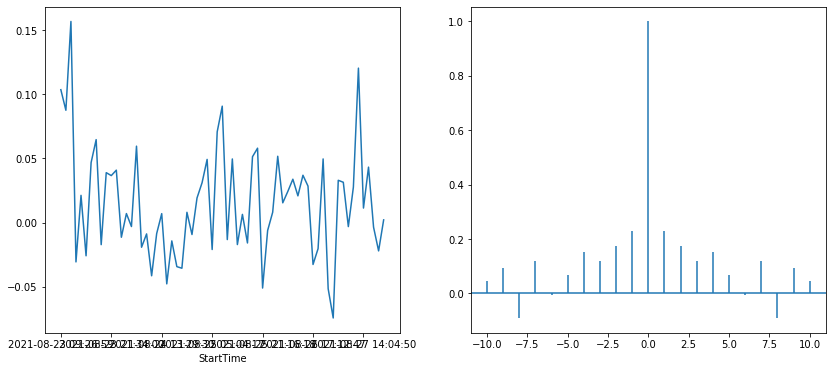

In [7]:
siteAcc = pltdata.query("Site==63")
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
siteAcc["Pm2p5MassConcDutAccuracy_1"].plot(ax=ax1)
ax2.acorr("Pm2p5MassConcDutAccuracy_1",data=siteAcc)

plt.show()

## angle_spectrum(x[, Fs, Fc, window, pad_to, ...]):	Plot the angle spectrum.?

(array([-1.31293114e-17, -3.01380940e+00, -5.50667886e-01, ...,
        -2.46906704e+00, -1.75079494e-01,  3.14159265e+00]),
 array([0.00000000e+00, 4.89715965e-04, 9.79431929e-04, ...,
        9.99020568e-01, 9.99510284e-01, 1.00000000e+00]),
 <matplotlib.lines.Line2D at 0x1ae300fffd0>)

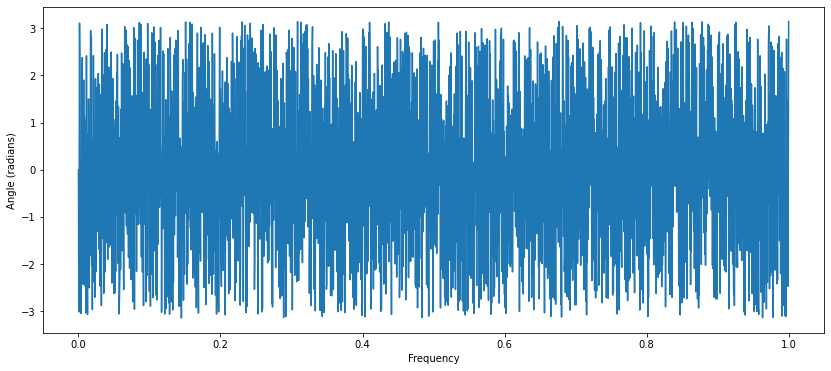

In [8]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot()
ax1.angle_spectrum(pltdata["Pm2p5MassConcDutAccuracy_1"])

## annotate(text, xy, *args, **kwargs):可以添加箭头的注释
    text:     str 文本内容;
    xy:       (float,float),要注释的那个地方的位置;
    xytext:   (float,float)(float,float), 文本的位置;
    xycoords: str or Artist or Transform or callable or (float, float), default: 'data', 见下面具体注释
    textcoords: str or Artist or Transform or callable or (float, float), default: value of xycoords
    arrowprops: dict, optional,在注释点和文本之间画一个箭头,除了下面这些属性外,它还继承了patch的属性
    annotation_clipbool or None, default: None, 当注释的位置xy超出画布范围,是否还要标注此注释
        If True, the annotation will only be drawn when xy is within the axes.
        If False, the annotation will always be drawn.
        If None, the annotation will only be drawn when xy is within the axes and xycoords is 'data'.
    
    **kwargs: 其他的不定参数会传给Text

Text(1.1, 4, 'patch propety is available for arrowprops')

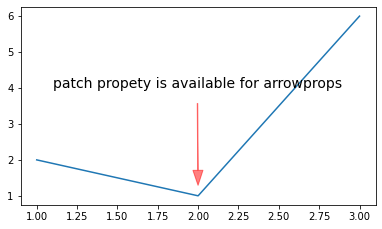

In [12]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
ax1.annotate(text="patch propety is available for arrowprops",xy=(2,1),xytext=(1.1,4),fontsize=14,arrowprops=dict(width=0.5,headwidth=10,headlength=15,facecolor='red',edgecolor="r",alpha=0.5,shrink=0.1))


## arrow: 添加箭头
    x,y:        float, 起点
    dx,dy:      float,箭头的长度
    width:      float,default 0.001, 箭头尾部宽度
    length_includes_head: 
                bool,default:False, 长度是否包括箭头部分
    head_width:  float or None,default:3*width
    head_length: float or None, default:1.5*head_width
    shape:       {'full', 'left', 'right'}, default: 'full'
    overhang:     float,default:0 箭头向后扫的分数（0表示三角形）。可以是负数或大于1
    head_starts_at_zero: bool, default: False, 调转箭头的方向
                如果为True，则在坐标0处开始绘制头部，而不是在坐标0处结束。
                
    **kwargs: Patch属性

Text(1, 5, "the arrow and the body is not angle, \nuse 'annotate' plot the angle arrow please")

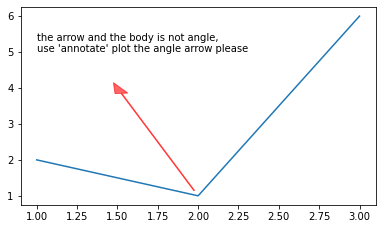

In [13]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,2,3],[2,1,6])
ax1.arrow(x=2,
          y=1,
          dx=-0.5,
          dy=3,
          width=0.005,
          length_includes_head=True,
          head_width=0.08,
          head_length=0.3,
          shape="full",
          overhang=0,
          head_starts_at_zero=True,   #不起作用?
          ec="r",
          facecolor="r",
          alpha=0.6
         )
ax1.text(s="the arrow and the body is not angle, \nuse 'annotate' plot the angle arrow please",x=1,y=5)

# 结果箭头受轴长宽比和限制的影响。这可能会产生一个箭头，其头部与其杆不成直角。要创建一个箭头，其头部与其杆成直角，请使用 annotate() 例如：
# >>> ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
# ...             arrowprops=dict(arrowstyle="->"))

## autoscale([enable, axis, tight])	Autoscale the axis view to the data (toggle)
    enable: bool
    axis: 'both','x','y'
    tight: bool or None, defaut: None
        如果为True，请先将页边距设置为零。然后，此参数被转发到 autoscale_view （不管其值如何）；请参见此处对其行为的描述

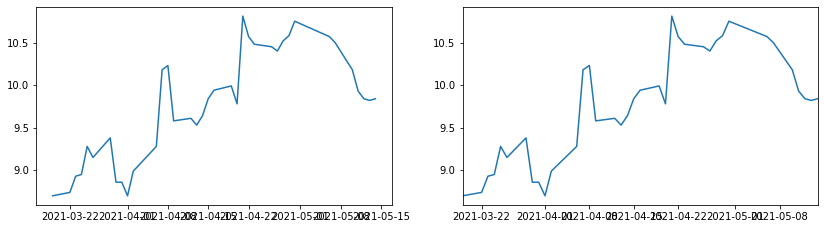

In [14]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot("open",data=data)

ax2 = fig.add_subplot(222)
ax2.plot("open",data=data)
ax2.autoscale(enable=True,axis='x',tight=True)

## autumn()	Set the colormap to 'autumn'.

## axes([arg])	Add an axes to the current figure and make it the current axes.

<AxesSubplot:>

<AxesSubplot:>

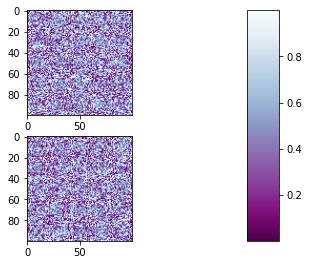

In [15]:
# Fixing random state for reproducibility
np.random.seed(19680801)

plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

## axhline:Add a horizontal line across the axis

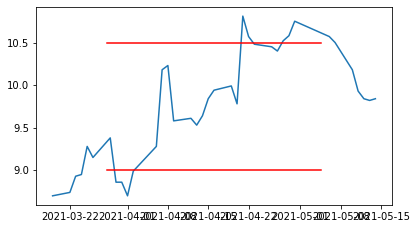

In [16]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot("open",data=data)
plt.axhline(9.0,xmin=0.2,xmax=0.8,c='r')
plt.axhline(10.5,xmin=0.2,xmax=0.8,c='r')

## axhspan	Add a horizontal span (rectangle) across the Axes.
    ymin
    ymax
    xmin: 0~1
    xmax: 0~1

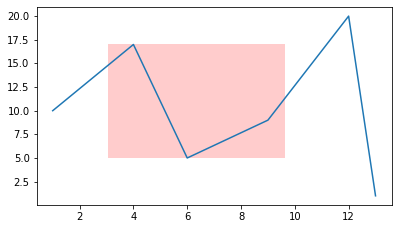

In [17]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,4,6,9,12,13],[10,17,5,9,20,1])
plt.axhspan(ymin=5,ymax=17.0,xmin=0.2,xmax=0.7,facecolor='r',alpha=0.2)

## axis:获取或设置某些轴属性的方便方法
    
    Call signatures:
        xmin, xmax, ymin, ymax = axis()
        xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
        xmin, xmax, ymin, ymax = axis(option)
        xmin, xmax, ymin, ymax = axis(**kwargs)
        
    xmin, xmax, ymin, ymax: float, optional
        The axis limits to be set. This can also be achieved using
        ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    option: bool or str
    emit:bool, default: True
        是否通知观察者轴极限变化。此选项传递给 set_xlim 和 set_ylim .
    
    返回:xmin、xmax、ymin、ymax: float

In [18]:
# option:If a bool, turns axis lines and labels on or off. If a string, possible values are:
    # Value	Description
    # 'on'	Turn on axis lines and labels. Same as True.
    # 'off'	Turn off axis lines and labels. Same as False.
    # 'equal'	Set equal scaling (i.e., make circles circular) by changing axis limits. This is the same as ax.set_aspect('equal', adjustable='datalim'). Explicit data limits may not be respected in this case.
    # 'scaled'	Set equal scaling (i.e., make circles circular) by changing dimensions of the plot box. This is the same as ax.set_aspect('equal', adjustable='box', anchor='C'). Additionally, further autoscaling will be disabled.
    # 'tight'	Set limits just large enough to show all data, then disable further autoscaling.
    # 'auto'	Automatic scaling (fill plot box with data).
    # 'image'	'scaled' with axis limits equal to data limits.
    # 'square'	Square plot; similar to 'scaled', but initially forcing xmax-xmin == ymax-ymin.

(2.0, 10.0, 5.0, 15.0)

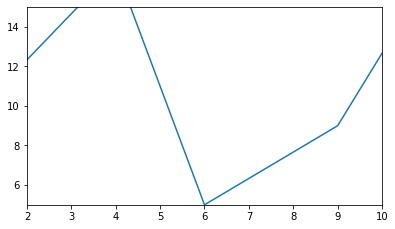

In [19]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,4,6,9,12,13],[10,17,5,9,20,1])
ax1.axis(xmin=2,xmax=10,ymin=5,ymax=15,
#          option=False,    #报告没有该参数
         emit=True)

## axline:加一条无限长的直线

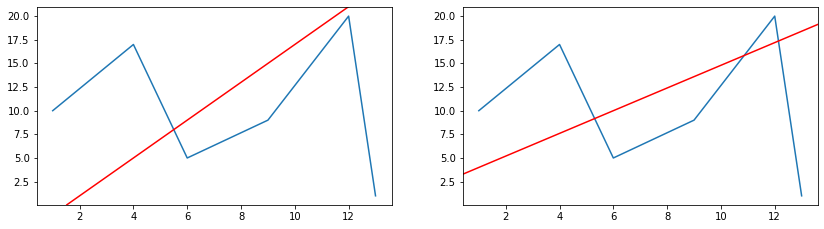

In [20]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,4,6,9,12,13],[10,17,5,9,20,1])
ax1.axline(xy1=(4,5),xy2=(10,17),color='r')

ax2 = fig.add_subplot(222)
ax2.plot([1,4,6,9,12,13],[10,17,5,9,20,1])
ax2.axline(xy1=(6,10),slope=1.2,color='r')

## axvline:添加一条垂直线

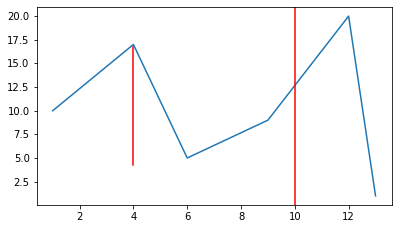

In [21]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,4,6,9,12,13],[10,17,5,9,20,1])
ax1.axvline(x=4,ymin=0.2,ymax=0.8,color='r')
ax1.axvline(x=10,color='r')


## axvspan:添加一个垂直跨度（矩形)
    xmin:
    xmax:
    ymin: 0~1
    ymax: 0~1
    
    **kwargs: Polygon 多边形属性

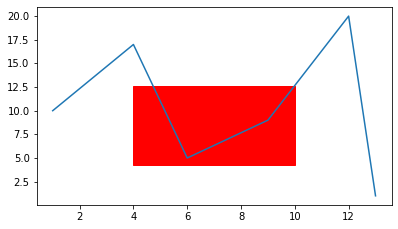

In [22]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,4,6,9,12,13],[10,17,5,9,20,1])
ax1.axvspan(xmin=4,xmax=10,ymin=0.2,ymax=0.6,color='r')

## bar:绘制条形图

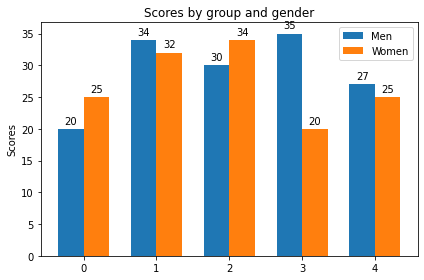

In [10]:
# 测试数据
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]


x = np.arange(len(labels))  # the label locations [0,1,2,3,4]
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
# ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()

In [24]:
dt = data.head(3)

In [25]:
dt

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2021-03-19,000009.SZ,8.70,8.78,8.65,8.76,8.71,0.05,0.5741,321843.00,280668.282
2021-03-22,000009.SZ,8.74,8.99,8.71,8.92,8.76,0.16,1.8265,311235.89,276282.075
2021-03-23,000009.SZ,8.93,9.05,8.81,8.98,8.92,0.06,0.6726,348621.36,311317.646


<BarContainer object of 3 artists>

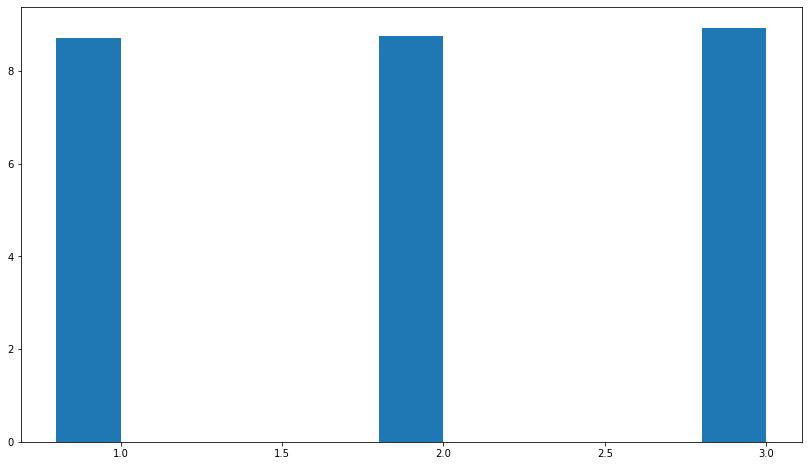

In [26]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
w=0.2
ax.bar(x=[x-w/2 for x in [1,2,3]],height=dt.open,width=w)
# ax.bar(x=[x+w/2 for x in [1,2,3]],height=dt.high,width=w,alpha=0.2)

Text(0, 0.5, 'Scores')

Text(0.5, 1.0, 'Scores by group and gender')

([<matplotlib.axis.XTick at 0x1ae31700880>,
 [Text(0, 0, 'G1'),
  Text(1, 0, 'G2'),
  Text(2, 0, 'G3'),
  Text(3, 0, 'G4'),
  Text(4, 0, 'G5')])

([<matplotlib.axis.YTick at 0x1ae3170c940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

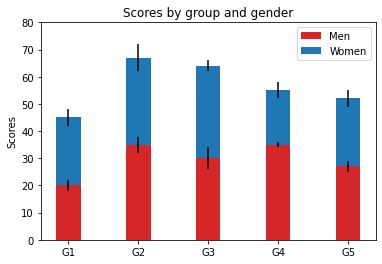

In [27]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='#d62728', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [28]:
list(p1)

## bar_label(container[, labels, fmt, ...])	Label a bar plot.

## barbs:绘制一个二维倒钩区域
    barbs([X, Y], U, V, [C], **kw)

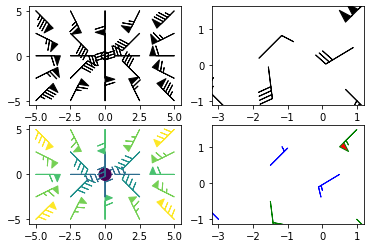

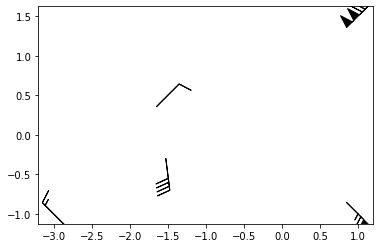

In [29]:
x = np.linspace(-5, 5, 5)
X, Y = np.meshgrid(x, x)
U, V = 12 * X, 12 * Y

data = [(-1.5, .5, -6, -6),
        (1, -1, -46, 46),
        (-3, -1, 11, -11),
        (1, 1.5, 80, 80),
        (0.5, 0.25, 25, 15),
        (-1.5, -0.5, -5, 40)]

data = np.array(data, dtype=[('x', np.float32), ('y', np.float32),
                             ('u', np.float32), ('v', np.float32)])

fig1, axs1 = plt.subplots(nrows=2, ncols=2)
# Default parameters, uniform grid
axs1[0, 0].barbs(X, Y, U, V)

# Arbitrary set of vectors, make them longer and change the pivot point
# (point around which they're rotated) to be the middle
axs1[0, 1].barbs(
    data['x'], data['y'], data['u'], data['v'], length=8, pivot='middle')

# Showing colormapping with uniform grid.  Fill the circle for an empty barb,
# don't round the values, and change some of the size parameters
axs1[1, 0].barbs(
    X, Y, U, V, np.sqrt(U ** 2 + V ** 2), fill_empty=True, rounding=False,
    sizes=dict(emptybarb=0.25, spacing=0.2, height=0.3))

# Change colors as well as the increments for parts of the barbs
axs1[1, 1].barbs(data['x'], data['y'], data['u'], data['v'], flagcolor='r',
                 barbcolor=['b', 'g'], flip_barb=True,
                 barb_increments=dict(half=10, full=20, flag=100))

# Masked arrays are also supported
masked_u = np.ma.masked_array(data['u'])
masked_u[4] = 1000  # Bad value that should not be plotted when masked
masked_u[4] = np.ma.masked

# Identical plot to panel 2 in the first figure, but with the point at
# (0.5, 0.25) missing (masked)
fig2, ax2 = plt.subplots()
ax2.barbs(data['x'], data['y'], masked_u, data['v'], length=8, pivot='middle')

plt.show()

## barh:绘制水平条形图
    y: float or array-like; y轴坐标位置
    width: float or array-like; 条形的宽度
    height: float or array-like, default:0.8, 条形图高度
    left: float or array-like, default:0; 条左侧的x坐标
    align:{'center', 'edge'}, default: 'center'
    
    Other Parameters:
    color:
    edgecolor:
    linewidth:
    tick_label:
    xerr,yerr:
    ecolor:
    capsize:
    error_kw: dict,optional
    log: bool, default,False; if True, set the x-axis to be log scale;
    
    **kwargs: Rectangle

(<Figure size 662.4x360 with 1 Axes>, <AxesSubplot:>)

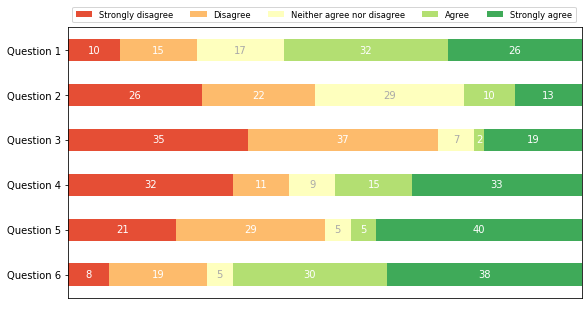

In [30]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

## bone()	Set the colormap to 'bone'.

## box([on])	Turn the axes box on or off on the current axes.

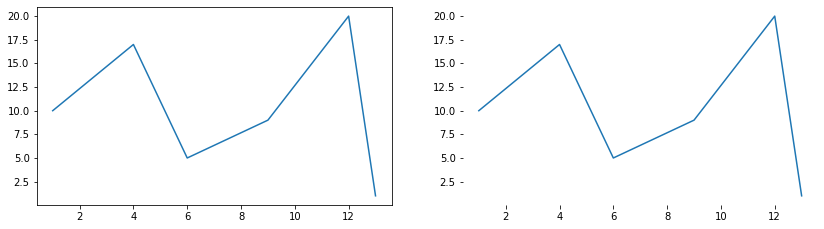

In [31]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,4,6,9,12,13],[10,17,5,9,20,1])
plt.box(True)

ax2 = fig.add_subplot(222)
ax2.plot([1,4,6,9,12,13],[10,17,5,9,20,1])
plt.box(False)

## boxplot: 画箱式图

In [32]:
dtc.head(2)

,StartTime,DeviceId,DeviceIdInternal,Pm2p5MassConcDutAccuracy_1,Pm2p5MassConcDutMean_1,Pm2p5MassConcDutAccuracy_2,Pm2p5MassConcDutMean_2,PmTrayId,Site,FacilityNr,day,week,month
0,2021-08-23 09:26:59,DF45D11491134182,-2.358249e+18,0.039416,539.418701,0.008956,279.378815,70,45.0,CN-100341,2021-08-23,34,2021-08
1,2021-08-23 09:26:59,C973F4915E81F6FF,-3.930529e+18,-0.015186,511.082214,0.022469,283.120331,70,33.0,CN-100341,2021-08-23,34,2021-08


{'whiskers': [<matplotlib.lines.Line2D at 0x1ae32f47c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae32f563d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae32f478e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae32f56af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae32f56e80>],
 'means': []}

Text(0.6, 0, 'everything default')

Text(1.1, 0.02, 'showfliers=True(default)')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae32fa23d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae32fa29d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae32fa2040>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae32fae130>],
 'fliers': [],
 'means': []}

Text(1.2, 0.02, 'notch=True')

Text(1.1, -0.05, 'showfliers=False')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae32fe8850>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae32fe8e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae32fe84c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae32ff65b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae32ff6940>],
 'means': []}

Text(1.1, -0.05, "sys= Line2D marker's value, \n'' mean no flieres")

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae33035cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae33044310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae33035940>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae33044a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae33044dc0>],
 'means': []}

Text(-0.2, 0.8, 'vert=False')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae3308d280>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae3308d880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae33080eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae3308dfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae3309b370>],
 'means': []}

Text(1.1, 0.02, 'whis=3:Q1&Q3 position\nwhis=(0,100)')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae330db460>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae330dba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae330db0d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ae330e81c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ae330e8550>,
 'means': []}

Text(2.1, -0.15, 'positions=[2,3],\nthen can set_xticklabels()')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae3313d2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae3313d8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae3312ff10>,
 'medians': [<matplotlib.lines.Line2D at 0x1ae33149040>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ae331493d0>,
 'means': []}

Text(1.1, -0.15, 'widths=[0.3,0.6]')

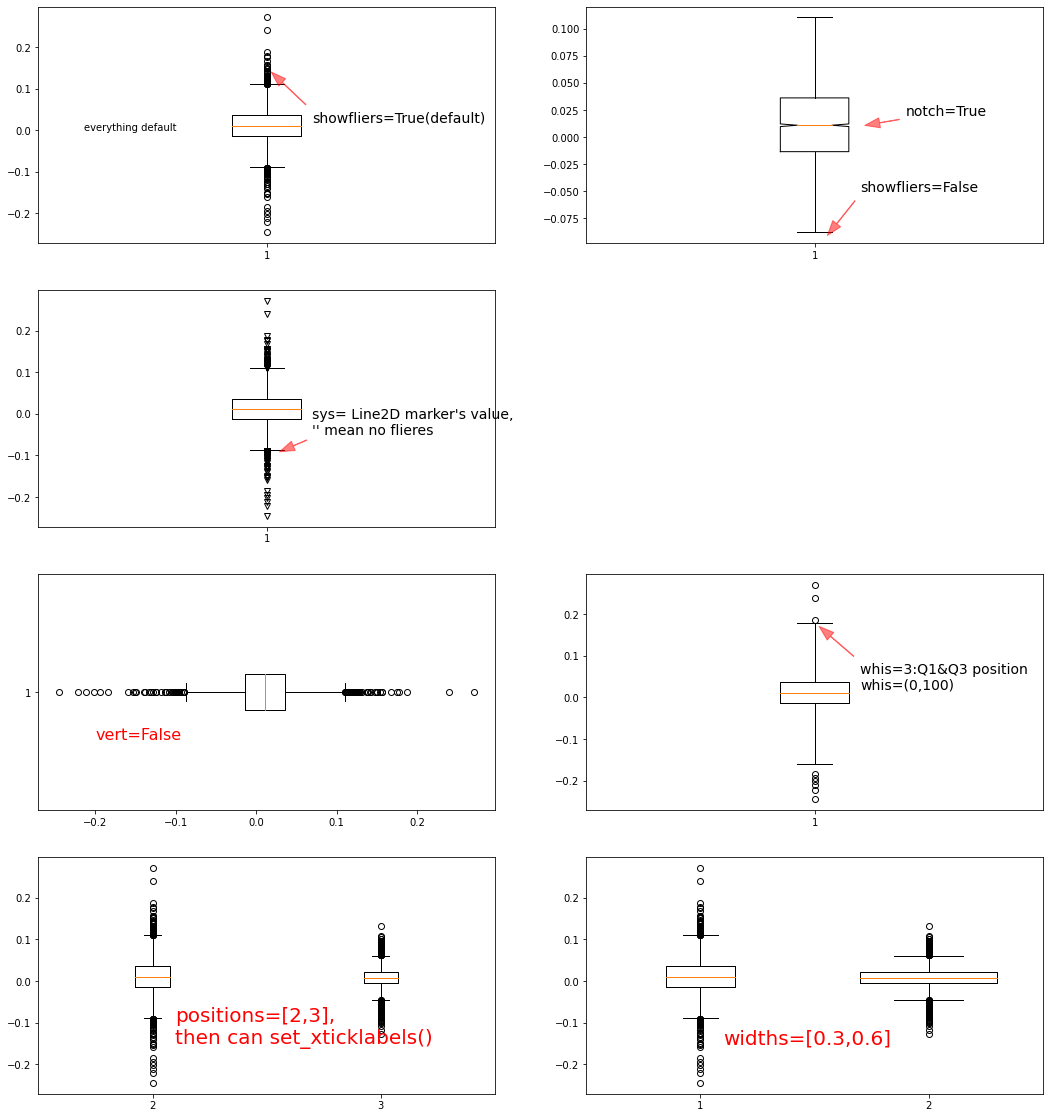

In [33]:
fig = plt.figure(figsize=(18,20))
ax1 = fig.add_subplot(421)
ax1.boxplot(dtc.Pm2p5MassConcDutAccuracy_1,notch=False,showfliers=True)
ax1.text(s="everything default",x=0.6,y=0)
ax1.annotate(text="showfliers=True(default)",xy=(1,0.15),xytext=(1.1,0.02),fontsize=14,arrowprops=dict(width=0.5,headwidth=10,headlength=15,facecolor='red',edgecolor="r",alpha=0.5,shrink=0.1))

ax2 = fig.add_subplot(422)
ax2.boxplot(dtc.Pm2p5MassConcDutAccuracy_1,notch=True,showfliers=False)
ax2.annotate(text="notch=True",xy=(1.1,0.01),xytext=(1.2,0.02),fontsize=14,arrowprops=dict(width=0.5,headwidth=10,headlength=15,facecolor='red',edgecolor="r",alpha=0.5,shrink=0.1))
ax2.annotate(text="showfliers=False",xy=(1.02,-0.095),xytext=(1.1,-0.05),fontsize=14,arrowprops=dict(width=0.5,headwidth=10,headlength=15,facecolor='red',edgecolor="r",alpha=0.5,shrink=0.1))

ax3 = fig.add_subplot(423)
ax3.boxplot(dtc.Pm2p5MassConcDutAccuracy_1,showfliers=True,sym='v')
ax3.annotate(text="sys= Line2D marker's value, \n'' mean no flieres",xy=(1.02,-0.095),xytext=(1.1,-0.05),fontsize=14,arrowprops=dict(width=0.5,headwidth=10,headlength=15,facecolor='red',edgecolor="r",alpha=0.5,shrink=0.1))

# ax4 = fig.add_subplot(424)
# ax4.boxplot(dtc.Pm2p5MassConcDutAccuracy_1,flierprops=dict(markerfacecolor='r', marker='s',markeredgecolor='r'))
# ax4.annotate(text="flierprops={}\nIt's Line2D marker params & values",xy=(1,0.15),xytext=(1.1,0.02),fontsize=14,arrowprops=dict(width=0.5,headwidth=10,headlength=15,facecolor='red',edgecolor="r",alpha=0.5,shrink=0.1))

ax5 = fig.add_subplot(425)
ax5.boxplot(dtc.Pm2p5MassConcDutAccuracy_1,vert=False)
ax5.text(s="vert=False",x=-0.2,y=0.8,fontsize=16,color='r')

ax6 = fig.add_subplot(426)
ax6.boxplot(dtc.Pm2p5MassConcDutAccuracy_1,whis=3)
ax6.annotate(text="whis=3:Q1&Q3 position\nwhis=(0,100)",xy=(1,0.18),xytext=(1.1,0.02),fontsize=14,arrowprops=dict(width=0.5,headwidth=10,headlength=15,facecolor='red',edgecolor="r",alpha=0.5,shrink=0.1))

ax7 = fig.add_subplot(427)
ax7.boxplot([dtc.Pm2p5MassConcDutAccuracy_1,dtc.Pm2p5MassConcDutAccuracy_2],positions=[2,3])
ax7.text(s="positions=[2,3],\nthen can set_xticklabels()",x=2.1,y=-0.15,fontsize=20,color='r')
# ax7.set_xticklabels(['before','after'])

ax8 = fig.add_subplot(428)
ax8.boxplot([dtc.Pm2p5MassConcDutAccuracy_1,dtc.Pm2p5MassConcDutAccuracy_2],widths=[0.3,0.6])
ax8.text(s="widths=[0.3,0.6]",x=1.1,y=-0.15,fontsize=20,color='r')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae3353b8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae3353beb0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1ae3353b520>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae33549640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae335499d0>],
 'means': []}

Text(0.5, 0.1, 'patch_artist=True')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae335564c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae33556be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae33556130>,
 'medians': [<matplotlib.lines.Line2D at 0x1ae3356a340>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ae3356a6d0>,
 'means': []}

Text(1.1, -0.2, "labels=['before','after']\nVS positions=[2,3]")

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae33595970>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae3359e0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae335955e0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ae3359e7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ae3359eb80>,
 'means': []}

Text(1.1, -0.2, 'manage_ticks=True(default)')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae335b5f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae335c46a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae335b5940>,
 'medians': [<matplotlib.lines.Line2D at 0x1ae335c4dc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ae335cf190>,
 'means': []}

Text(1.1, -0.2, 'manage_ticks=Falses')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae33609520>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae33609c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae33609190>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae335ef3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae335efaf0>],
 'means': [<matplotlib.lines.Line2D at 0x1ae335ef730>]}

Text(0.8, 650, 'showmeans=True,meanline=True')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae335f7550>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae335f7c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae335f71c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae3360b3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae3360baf0>],
 'means': [<matplotlib.lines.Line2D at 0x1ae3360b760>]}

Text(0.8, 650, 'showmeans=True,meanline=False')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae336344f0>,
 'caps': [],
 'boxes': [<matplotlib.lines.Line2D at 0x1ae33634160>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae33634c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae33634fa0>],
 'means': []}

Text(0.8, 650, 'showcaps=False(default:True)')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae3361a670>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae3361ad90>,
 'boxes': [],
 'medians': [<matplotlib.lines.Line2D at 0x1ae336284f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae33628880>],
 'means': []}

Text(0.8, 650, 'showbox=False(default:True)')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae3363b2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae3363b9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae33628d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae3364c130>],
 'fliers': [],
 'means': []}

Text(0.8, 650, 'showfliers=False(default:True)')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae3364cb20>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae3365d280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae3364c610>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae3365d9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae33660100>],
 'means': [<matplotlib.lines.Line2D at 0x1ae3365dd30>]}

Text(0.8, 650, 'showmeans=True(default:False)\nmeanline=True:show mean as line')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae33660d00>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae33668460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae33660910>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae33668b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae33668f10>],
 'means': []}

Text(0.5, 650, "capprops={'linewidth':3,'color':'r'}:Line2D property")

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae33676820>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae33676f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae33676370>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae336826a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae33682a30>],
 'means': []}

Text(0.8, 650, 'showbox={}:Line2D property')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae3368f5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae3368fcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae3368f220>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae33694430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae336947c0>],
 'means': []}

Text(0.8, 650, "whiskerprops={'color':'green'}\nLine2D property")

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae336a30d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae336a37f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae33694be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae336a3f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae336b52e0>],
 'means': []}

Text(1.1, 0.02, "flierprops={}\nIt's Line2D marker params & values")

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae336b5dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae336bd520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae336b5a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae336bdc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae336bdfd0>],
 'means': []}

Text(0.8, 450, "medianprops={'color':'purple','linewidth':3}\nLine2D")

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae336cd940>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae336d20a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae336cd520>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae336d27c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae336d2ee0>],
 'means': [<matplotlib.lines.Line2D at 0x1ae336d2b50>]}

Text(0.8, 450, "meanprops={'color':'purple','linewidth':3}\nmean line setting:Line2D")

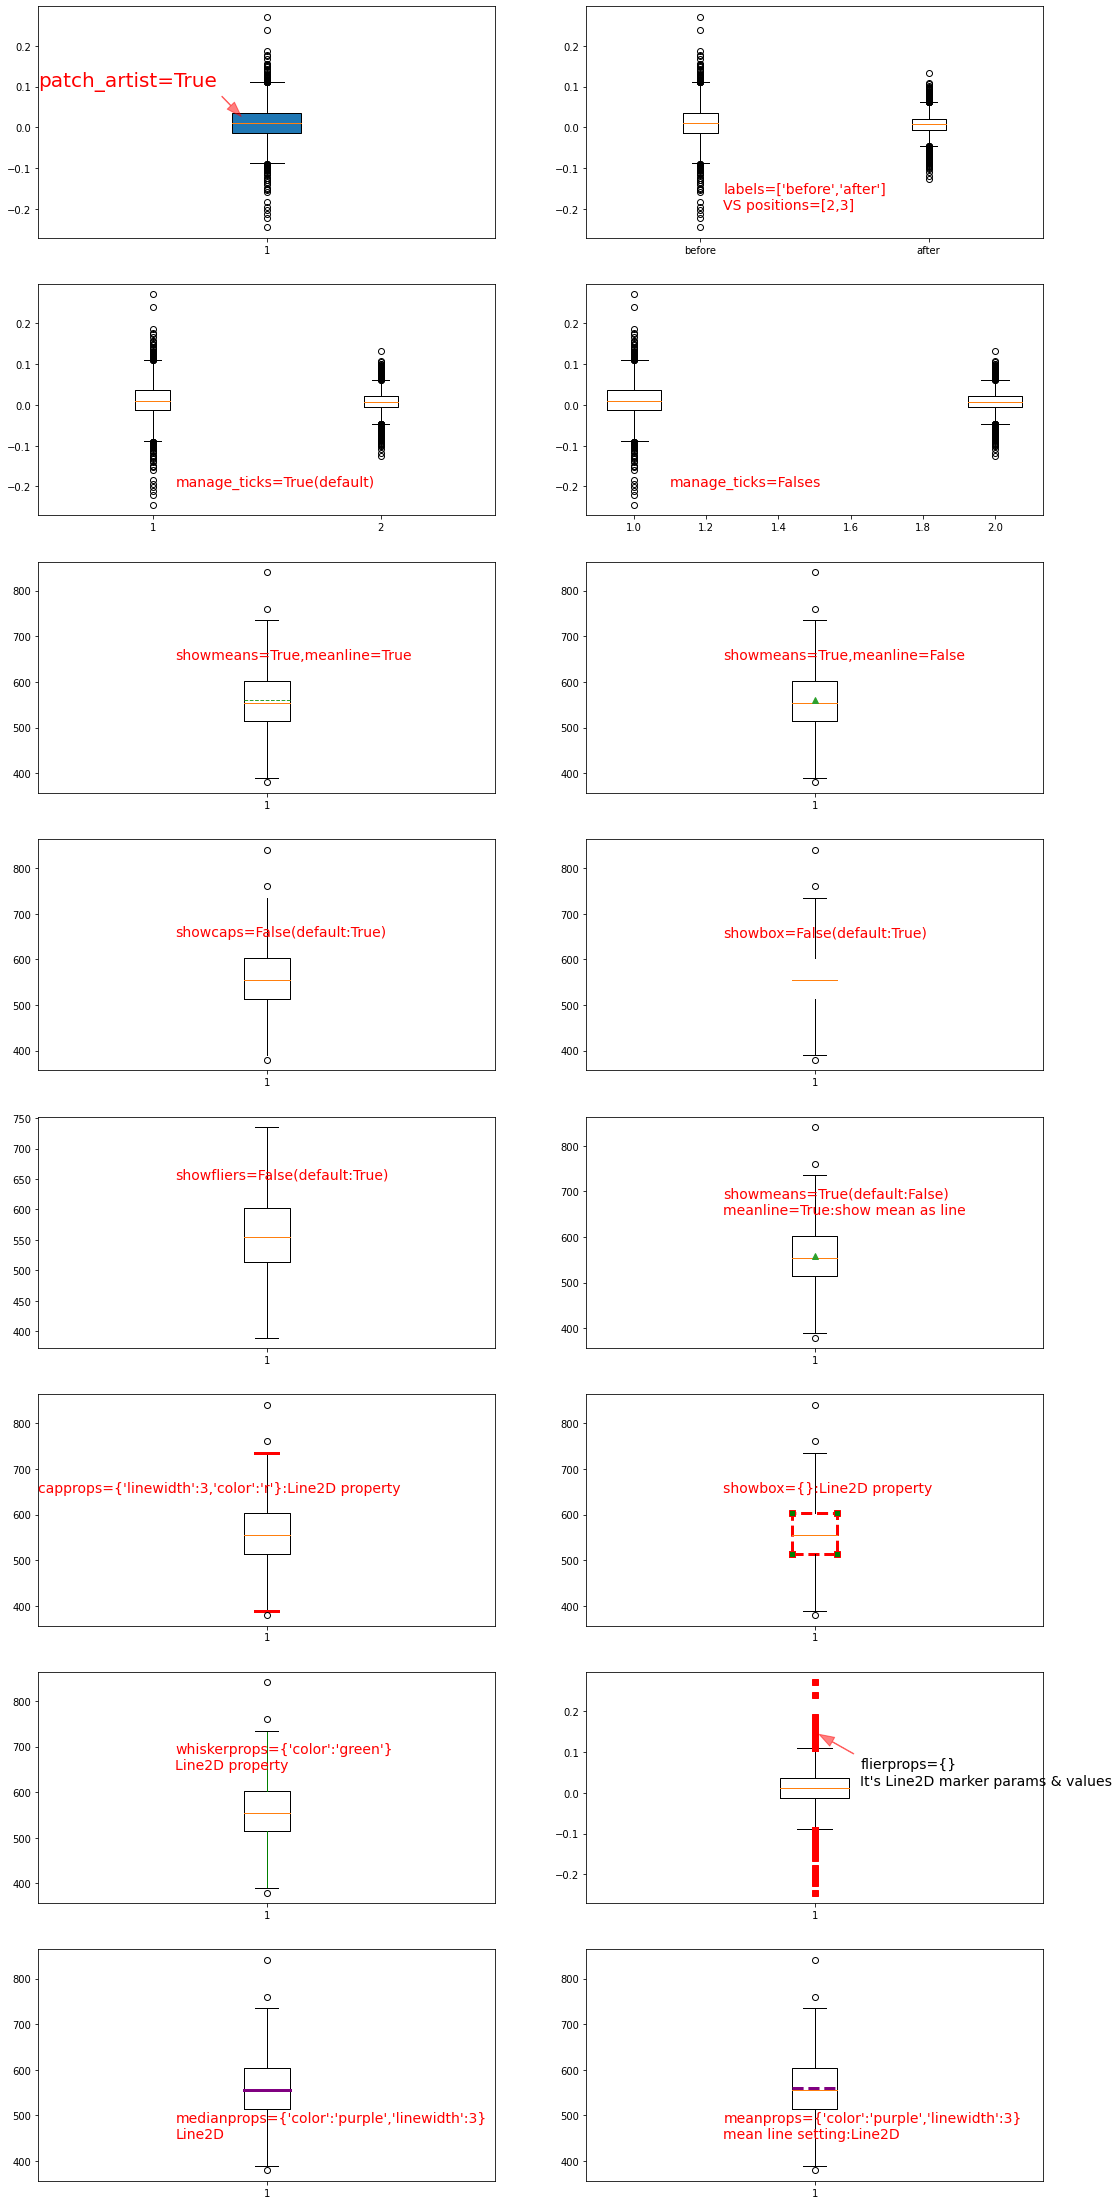

In [34]:
fig,ax = plt.subplots(8,2,figsize=(18,40))
ax[0,0].boxplot(dtc.Pm2p5MassConcDutAccuracy_1,patch_artist=True)
ax[0,0].annotate(text="patch_artist=True",xy=(0.95,0.02),xytext=(0.5,0.1),fontsize=20,color='r',arrowprops=dict(width=0.5,headwidth=10,headlength=15,facecolor='red',edgecolor="r",alpha=0.5,shrink=0.1))

ax[0,1].boxplot([dtc.Pm2p5MassConcDutAccuracy_1,dtc.Pm2p5MassConcDutAccuracy_2],labels=['before','after'])
ax[0,1].text(s="labels=['before','after']\nVS positions=[2,3]",x=1.1,y=-0.2,fontsize=14,color='r')

ax[1,0].boxplot([dtc.Pm2p5MassConcDutAccuracy_1,dtc.Pm2p5MassConcDutAccuracy_2],manage_ticks=True)
ax[1,0].text(s="manage_ticks=True(default)",x=1.1,y=-0.2,fontsize=14,color='r')

ax[1,1].boxplot([dtc.Pm2p5MassConcDutAccuracy_1,dtc.Pm2p5MassConcDutAccuracy_2],manage_ticks=False)
ax[1,1].text(s="manage_ticks=Falses",x=1.1,y=-0.2,fontsize=14,color='r')

ax[2,0].boxplot(dtc.Pm2p5MassConcDutMean_1,widths=0.1,showmeans=True,meanline=True)
ax[2,0].text(s="showmeans=True,meanline=True",x=0.8,y=650,fontsize=14,color='r')

ax[2,1].boxplot(dtc.Pm2p5MassConcDutMean_1,widths=0.1,showmeans=True,meanline=False)
ax[2,1].text(s="showmeans=True,meanline=False",x=0.8,y=650,fontsize=14,color='r')

ax[3,0].boxplot(dtc.Pm2p5MassConcDutMean_1,widths=0.1,showcaps=False)
ax[3,0].text(s="showcaps=False(default:True)",x=0.8,y=650,fontsize=14,color='r')

ax[3,1].boxplot(dtc.Pm2p5MassConcDutMean_1,widths=0.1,showbox=False)
ax[3,1].text(s="showbox=False(default:True)",x=0.8,y=650,fontsize=14,color='r')

ax[4,0].boxplot(dtc.Pm2p5MassConcDutMean_1,widths=0.1,showfliers=False)
ax[4,0].text(s="showfliers=False(default:True)",x=0.8,y=650,fontsize=14,color='r')

ax[4,1].boxplot(dtc.Pm2p5MassConcDutMean_1,widths=0.1,showmeans=True)
ax[4,1].text(s="showmeans=True(default:False)\nmeanline=True:show mean as line",x=0.8,y=650,fontsize=14,color='r')

ax[5,0].boxplot(dtc.Pm2p5MassConcDutMean_1,widths=0.1,capprops={'linewidth':3,'color':'r'})
ax[5,0].text(s="capprops={'linewidth':3,'color':'r'}:Line2D property",x=0.5,y=650,fontsize=14,color='r')

ax[5,1].boxplot(dtc.Pm2p5MassConcDutMean_1,widths=0.1,boxprops={"marker":'s',"markerfacecolor":'green','color':'r',"linestyle":'--','linewidth':3})
ax[5,1].text(s="showbox={}:Line2D property",x=0.8,y=650,fontsize=14,color='r')

ax[6,0].boxplot(dtc.Pm2p5MassConcDutMean_1,widths=0.1,whiskerprops={"color":'green'})
ax[6,0].text(s="whiskerprops={'color':'green'}\nLine2D property",x=0.8,y=650,fontsize=14,color='r')

ax[6,1].boxplot(dtc.Pm2p5MassConcDutAccuracy_1,flierprops=dict(markerfacecolor='r', marker='s',markeredgecolor='r'))
ax[6,1].annotate(text="flierprops={}\nIt's Line2D marker params & values",xy=(1,0.15),xytext=(1.1,0.02),fontsize=14,arrowprops=dict(width=0.5,headwidth=10,headlength=15,facecolor='red',edgecolor="r",alpha=0.5,shrink=0.1))

ax[7,0].boxplot(dtc.Pm2p5MassConcDutMean_1,widths=0.1,medianprops={'color':'purple','linewidth':3})
ax[7,0].text(s="medianprops={'color':'purple','linewidth':3}\nLine2D",x=0.8,y=450,fontsize=14,color='r')

ax[7,1].boxplot(dtc.Pm2p5MassConcDutMean_1,widths=0.1,showmeans=True,meanline=True,meanprops={'color':'purple','linewidth':3})
ax[7,1].text(s="meanprops={'color':'purple','linewidth':3}\nmean line setting:Line2D",x=0.8,y=450,fontsize=14,color='r')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae33852df0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae33864430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae33852a60>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae33864b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae33864ee0>],
 'means': []}

Text(0.5, -0.2, "boxplot('Pm2p5MassConcDutAccuracy_1',data=dtc)")

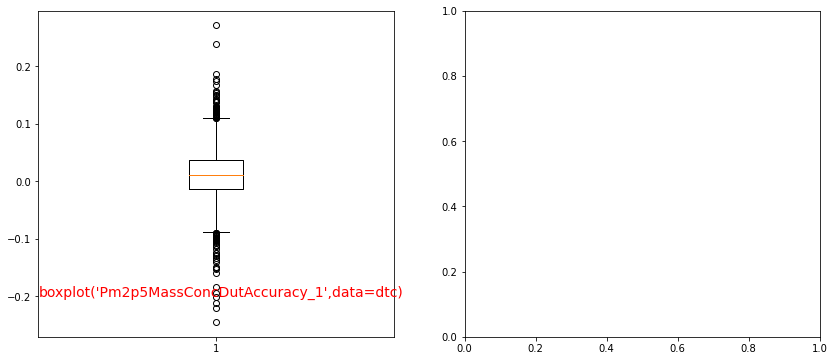

In [35]:
# data + s 的传参方式: 要求可以 data[s]或者 s in data
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax[0].boxplot(x='Pm2p5MassConcDutAccuracy_1',data=dtc)
ax[0].text(s="boxplot('Pm2p5MassConcDutAccuracy_1',data=dtc)",x=0.5,y=-0.2,fontsize=14,color='r')

## broken_barh:间断条形图
    是用来可视化定性数据的相同评价指标，在时间跨度上的变化情况。

In [36]:
import matplotlib as mpl

Text(0.5, 0, 'TrainTime')

([<matplotlib.axis.XTick at 0x1ae338b2b20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.YTick at 0x1ae338bdac0>,
 [Text(0, 12, 'city1'), Text(0, 32, 'city2')])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


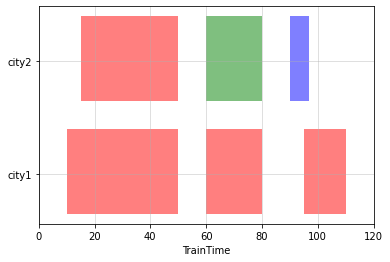

In [37]:
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

plt.broken_barh([(10, 40), (60, 20), (95, 15)],
                (5, 15),
                facecolors="r",
                alpha=0.5)
plt.broken_barh([(15, 35), (60, 20), (90, 7)],
                (25, 15),
                facecolors=("r", "g", "b"),
                alpha=0.5)
plt.xlabel("TrainTime")
plt.xticks(np.arange(0, 140, 20))
plt.yticks([12, 32], ["city1", "city2"])
plt.grid(alpha=0.5)
plt.show()

# [(10, 40), (60, 20), (95, 15)]：表示从X轴坐标分别为10,60,95处开始，延伸40,20和15.
# (5, 15)：表示从Y轴坐标为5处开始，延伸15的长度。

## cla()	Clear the current axes.请除当前轴

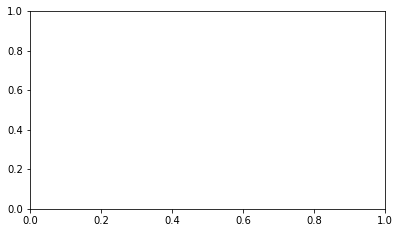

In [38]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,4,6,9,12,13],[10,17,5,9,20,1])
ax1.axvspan(xmin=4,xmax=10,ymin=0.2,ymax=0.6,color='r')
plt.cla()

## clabel(CS[, levels])	Label a contour plot.?

## clf():将figure清空

In [39]:
def clf_test():
    N = 5
    menMeans = (20, 35, 30, 35, 27)
    womenMeans = (25, 32, 34, 20, 25)
    menStd = (2, 3, 4, 1, 2)
    womenStd = (3, 5, 2, 3, 3)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, menMeans, width, color='#d62728', yerr=menStd)
    p2 = plt.bar(ind, womenMeans, width,
                 bottom=menMeans, yerr=womenStd)

    plt.ylabel('Scores')
    plt.title('Scores by group and gender')
    plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
    plt.yticks(np.arange(0, 81, 10))
    plt.legend((p1[0], p2[0]), ('Men', 'Women'))


    plt.clf()
    
clf_test()

<Figure size 432x288 with 0 Axes>

## clim:设置当前图像的颜色限制

## close:Close a figure window.

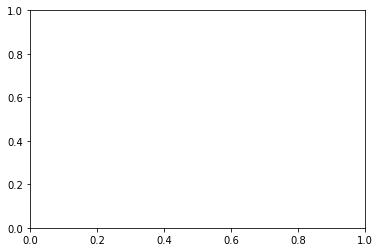

In [40]:
fig = plt.subplot()

In [41]:
fig = plt.subplot()
plt.close()

## cohere:绘制x和y之间的相干性,主要是光波的时间相干性和空间相干性

In [42]:
plt.cohere(x=data["high"],y=data["low"],NFFT=10)

ValueError: no field of name high

## colorbar([mappable, cax, ax])	Add a colorbar to a plot.

Text(0, 0, '1')

Text(1, 0, '2')

Text(0, 1, '3')

Text(1, 1, '4')

Text(0, 2, '5')

Text(1, 2, '6')

Text(0, 3, '7')

Text(1, 3, '8')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


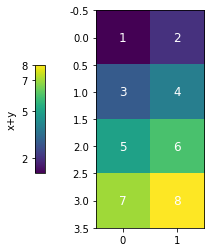

In [43]:
arr = [[1,2], [3,4], [5,6],[7,8]]
plt.imshow(X=arr,   #数组里的值会映射到颜色,x,y轴的坐标是基于数组中竖直位置来的
          )
for i in range(4):
    for j in range(2):
        plt.text(s=arr[i][j],x=j,y=i,color='white',fontsize=12, ha="center", va="center")
        
cr = plt.colorbar(
#              mappable=,   #此参数对于 Figure.colorbar 方法，但对于 pyplot.colorbar 函数，将默认值设置为当前图像。
             cax=None,      #指定axes,见下面例子
             ax=None,       #指定axis,见下面例子
             shrink=0.5,
            location="left",          #None or {'left', 'right', 'top', 'bottom'}
            orientation="vertical",   #"vertical","horizontal"
            fraction=0.5,             #default:0.15, Fraction of original axes to use for colorbar.
            aspect=10,                #default:20, Ratio of long to short dimensions.
            pad=0.15,                 #float, default: 0.05 if vertical, 0.15 if horizontal Fraction of original axes between colorbar and new image axes.
#             anchor=False,             #(float,float) or False, optional, The anchor point of the colorbar axes. Defaults to (0.0, 0.5) if vertical; (0.5, 1.0) if horizontal.
#             panchor=False,            #(float, float), or False, optional The anchor point of the colorbar parent axes. If False, the parent axes' anchor will be unchanged. Defaults to (1.0, 0.5) if vertical; (0.5, 0.0) if horizontal.
            ) 

#colorbar属性设置:
cr.set_ticks([2,5,7,8,9])
cr.set_label("x+y")
# 其他返回的属性怎么用?


Text(0, 0, '1')

Text(1, 0, '2')

Text(0, 1, '3')

Text(1, 1, '4')

Text(0, 2, '5')

Text(1, 2, '6')

Text(0, 3, '7')

Text(1, 3, '8')

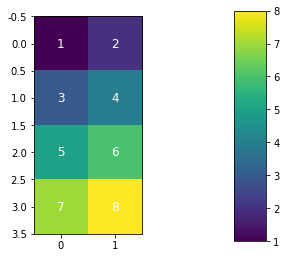

In [44]:
fig,ax = plt.subplots(1,1)

arr1 = [[1,2], [3,4], [5,6],[7,8]]
arr2 = [[1,2], [3,4], [5,6]]

iw1 = plt.imshow(X=arr1,   #数组里的值会映射到颜色,x,y轴的坐标是基于数组中竖直位置来的
          )
for i in range(4):
    for j in range(2):
        plt.text(s=arr[i][j],x=j,y=i,color='white',fontsize=12, ha="center", va="center")
        
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax, ax=ax, shrink=0.5)

## connect(s, func)	Bind function func to event s.

## contour(*args[, data])	Plot contour lines.绘制等高线

## contourf(*args[, data])	Plot filled contours.绘制等高线

## cool()	Set the colormap to 'cool'.

## copper()	Set the colormap to 'copper'.

## csd:Plot the cross-spectral density.绘制交叉光谱密度

## delaxes([ax])	Remove an Axes (defaulting to the current axes) from its figure.

In [45]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1,4,6,9,12,13],[10,17,5,9,20,1])
ax1.axvspan(xmin=4,xmax=10,ymin=0.2,ymax=0.6,color='r')
plt.delaxes()

<Figure size 1008x576 with 0 Axes>

## disconnect(cid)	Disconnect the callback with id cid.

## draw()	Redraw the current figure.

## draw_if_interactive()	Redraw the current figure if in interactive mode.

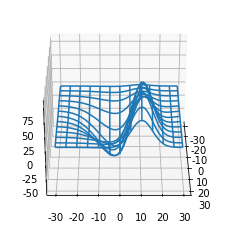

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [46]:
# 旋转的3D图形,需要放在notepad++里运行;
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.1)

## errorbar:将Y和X绘制为带有附加误差线的直线和/或标记。

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

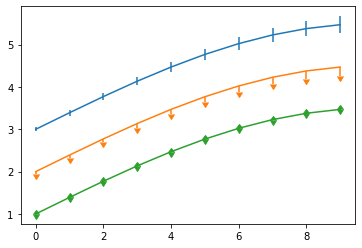

In [47]:
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
# plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
#              label='subsets of uplims and lolims')

# plt.legend(loc='lower right')

## eventplot:在给定位置绘制相同的平行线
    这种类型的绘图通常在神经科学中用于表示神经事件，通常称为尖峰栅格、点栅格或栅格绘图。

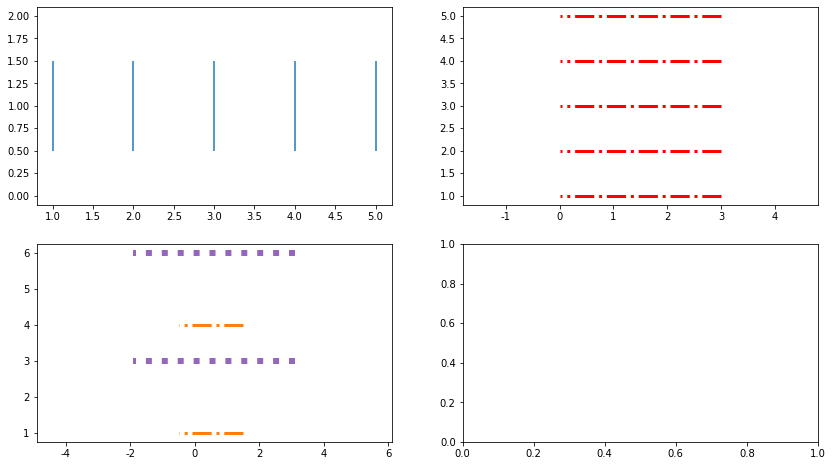

In [48]:
fig, axs = plt.subplots(2, 2,figsize=(14,8))
etrt = axs[0,0].eventplot(positions=[1,4,3,2,5],  #如果是1D数组,下面参数是单个的值,如果是2D数组,下面参数可以给列表;也就是一组数据的下面这些参数必须相同
                  orientation="horizontal",
                   lineoffsets=1,            #线中心的偏移量,默认是:1
                   linelengths=1,            #线的长度,某人是:1
                   linewidths=1.5,           #线的宽度,某人:1.5
                   colors='C0',              #线的颜色,某人:'C0', 可以是 'C1','C2','C3','C...'
                   linestyles='solid',       #线型,默认:'solid'
                   #其他参数见:LineCollection
                  )
# 返回值怎么用?

axs[0,1].eventplot(positions=[1,4,3,2,5],
                  orientation="vertical",
                   lineoffsets=1.5,
                   linelengths=3,
                   linewidths=3,
                   colors='red',
                   linestyles='dashdot'
                  )

axs[1,0].eventplot(positions=[[1,4],[3,6]],
                  orientation="vertical",
                   lineoffsets=[0.5,0.6],
                   linelengths=[2,5],
                   linewidths=[3,6],
                   colors=['C1','C4'],
                   linestyles=['dashdot',':']
                  )

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


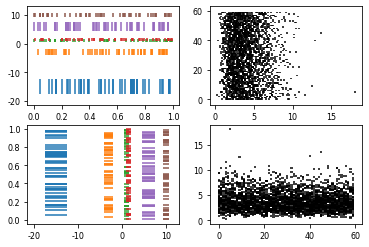

In [49]:
# 官网示例:

import matplotlib
matplotlib.rcParams['font.size'] = 8.0

# Fixing random state for reproducibility
np.random.seed(19680801)


# create random data
data1 = np.random.random([6, 50])

# set different colors for each set of positions
colors1 = ['C{}'.format(i) for i in range(6)]

# set different line properties for each set of positions
# note that some overlap
lineoffsets1 = [-15, -3, 1, 1.5, 6, 10]
linelengths1 = [5, 2, 1, 1, 3, 1.5]

fig, axs = plt.subplots(2, 2)

# create a horizontal plot
axs[0, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1)

# create a vertical plot
axs[1, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation='vertical')

# create another set of random data.
# the gamma distribution is only used for aesthetic purposes
data2 = np.random.gamma(4, size=[60, 50])

# use individual values for the parameters this time
# these values will be used for all data sets (except lineoffsets2, which
# sets the increment between each data set in this usage)
colors2 = 'black'
lineoffsets2 = 1
linelengths2 = 1

# create a horizontal plot
axs[0, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2)


# create a vertical plot
axs[1, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2, orientation='vertical')

plt.show()

## figimage:Add a non-resampled image to the figure.

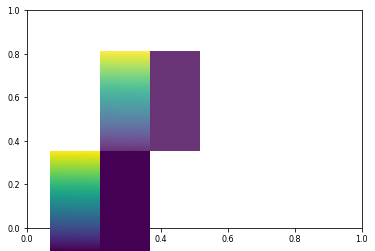

In [50]:
fig = plt.figure()
ax = fig.add_subplot()
Z = np.arange(10000).reshape((100, 100))
Z[:, 50:] = 1

im1 = fig.figimage(Z, xo=50, yo=0, origin='lower')
im2 = fig.figimage(Z, xo=100, yo=100, alpha=.8, origin='lower')

plt.show()

## figlegend:Place a legend on the figure.
    figlegend: 显示figure上面所有axes里面的数据图例;
    legend: 只显示单个axes里面数据的图例

### figlegend():自动获取label

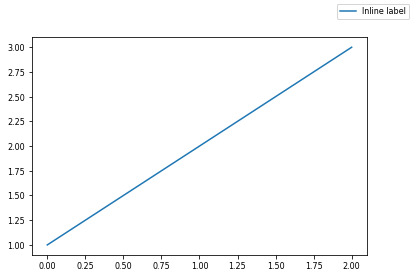

In [51]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot([1, 2, 3], label='Inline label')
plt.figlegend()


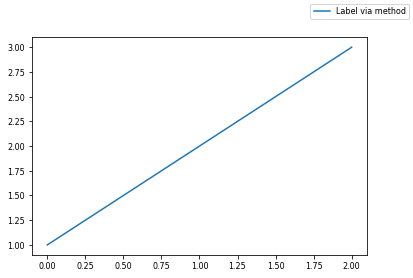

In [52]:
fig = plt.figure()
ax = fig.add_subplot()
line, = ax.plot([1, 2, 3])
line.set_label('Label via method')
plt.figlegend()

Text(0.5, 0.98, 'figlegend vs legend')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


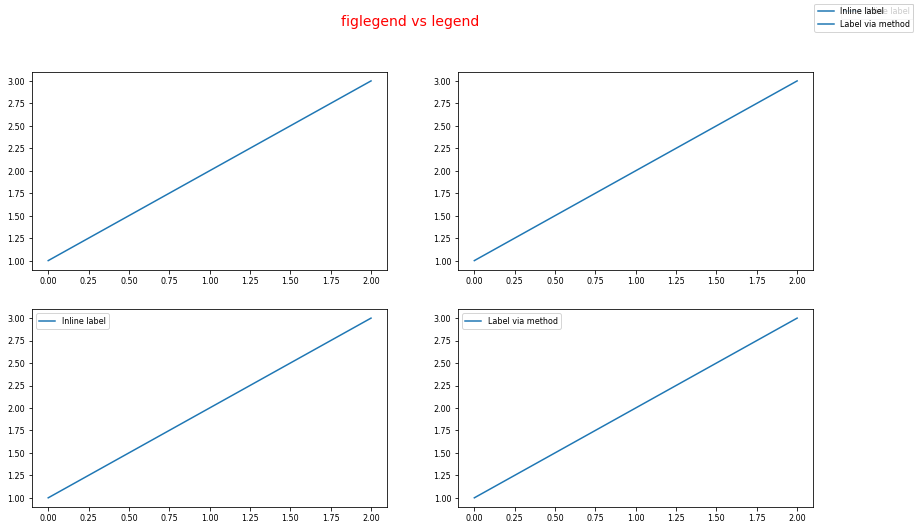

In [53]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1, 2, 3], label='Inline label')
plt.figlegend()

ax2 = fig.add_subplot(222)
line, = ax2.plot([1, 2, 3])
line.set_label('Label via method')
plt.figlegend()

ax3 = fig.add_subplot(223)
ax3.plot([1, 2, 3], label='Inline label')
ax3.legend()

ax4 = fig.add_subplot(224)
line, = ax4.plot([1, 2, 3])
line.set_label('Label via method')
ax4.legend()

fig.suptitle("figlegend vs legend",fontsize=14,color='r')

### figlegend(labels):在这里指定label,这种方式不推荐,因为label的对应关系只是通过顺序对应,容易出错

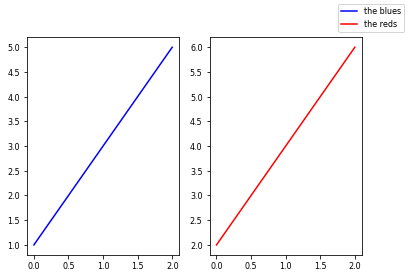

In [54]:
fig, (ax1, ax2)  = plt.subplots(1, 2)
ax1.plot([1, 3, 5], color='blue')
ax2.plot([2, 4, 6], color='red')
plt.figlegend(['the blues', 'the reds'])

### figlegend(handles, labels):Explicitly defining the elements in the legend

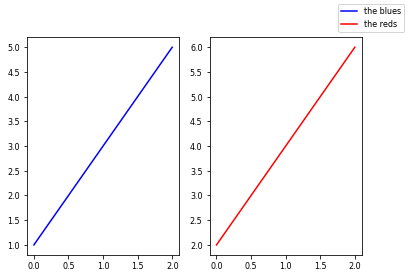

In [55]:
fig, (ax1, ax2)  = plt.subplots(1, 2)
line1, = ax1.plot([1, 3, 5], color='blue')
line2, = ax2.plot([2, 4, 6], color='red')
plt.figlegend(handles=[line1,line2],
              labels=['the blues', 'the reds'])

### figlegend:参数介绍
    返回: legend
    see also: plt.legend

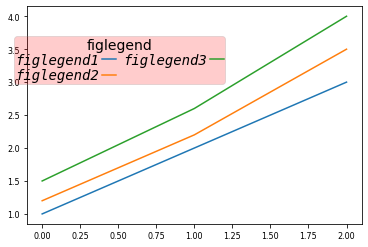

In [56]:
fig = plt.figure()
ax = fig.add_subplot()
line1, = ax.plot([1, 2, 3])
line2, = ax.plot([1.2, 2.2, 3.5])
line3, = ax.plot([1.5, 2.6, 4])
plt.figlegend(handles=[line1,line2,line3],        #optional, handles
             labels=['figlegend1','figlegend2','figlegend3'],   #labels
              
#               loc='upper left',      #选择legend位置
              bbox_to_anchor=(0.6,0.8),       #此参数允许将图例放在任意位置,bbox (x, y, width, height),x,y是图例右上角位置 范围0~1
              ncol=2,                  #图例分为几列
              prop={'family':'monospace','style':'italic','size':14},
              fontsize=14,             #字体大小,是prop里面的size参数;
              labelcolor='black',
              numpoints=1,            #??
              scatterpoints=1,        #当画的是三点图时,图例上点的个数;
              scatteryoffsets=[1, 0.5, 0.3125],
              
              markerscale=1,          #float,与最初绘制的图例标记相比，图例标记的相对大小。
              markerfirst=False,      #bool,图例上的marker是放在文字的左边还是右边;
              
              frameon=True,          #bool,图例是否要绘在框框里;
              fancybox=True,         #bool,
              shadow=False,           #bool,背景填充,在frameon=True时,适用
              framealpha=0.2,        #float,frameon=True,shadow=True, 配合使用
              facecolor='r',         #背景填充色
              edgecolor='0.5',       #"inherit" or color, default: rcParams["legend.edgecolor"] (default: '0.8')
              
              mode=None,         #'expand',None,"expand" the legend will be horizontally expanded to fill the axes area 
              
              title='figlegend',
              title_fontsize=14,    #int,{'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)
         
              borderpad=0.1,        #框边距,default:0.4
              labelspacing=0.1,     #图例的行距,default:0.5
              
              handlelength=1,       #marker的长度,default:2.0
              handletextpad=0.2,    #marker和字体之间距离,default:0.8
              
              borderaxespad=0.5,      #图例框到axes边的距离;
              
              columnspacing=0.5,    #图例的列距,如果有多列的话
              
#               handler_map=,       #自定义handler实例类型,请参见官网
              
             )

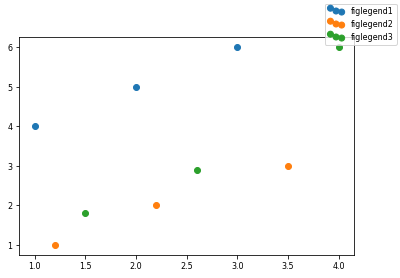

In [57]:
fig = plt.figure()
ax = fig.add_subplot()
line1 = ax.scatter([1, 2, 3], [4, 5, 6])
line2 = ax.scatter([1.2, 2.2, 3.5],[1, 2, 3])
line3 = ax.scatter([1.5, 2.6, 4],[1.8, 2.9, 6])
plt.figlegend(handles=[line1,line2,line3],        #optional, handles
             labels=['figlegend1','figlegend2','figlegend3'],   #labels
              scatterpoints=3,        #?
              scatteryoffsets=[1, 0.5, 0.3125]
             )

## fignum_exists(num)	返回具有给定ID的图形是否存在

True

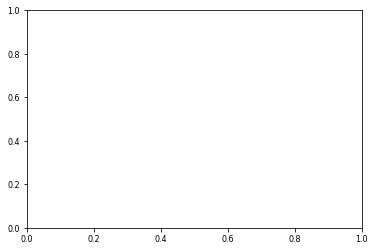

In [58]:
fig = plt.figure()
ax = fig.add_subplot()
# ax.set_gid("tst_id_01")
plt.fignum_exists(fig.number)   #判断这个图形存不存在

## figtext:Add text to figure.

Text(0.5, 0.3, 'figtext')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


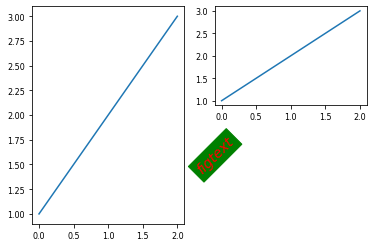

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot([1, 2, 3], label='Inline label1')

ax2 = fig.add_subplot(222)
ax2.plot([1, 2, 3], label='Inline label2')

plt.figtext(x=0.5,     #0~1
            y=0.3,     #0~1
            s = "figtext",
            fontdict={'size':14,'color':'r'},   #fontdict 及Text属性参数都可以设置文本属性
            
#             Text属性
            fontstyle='italic',
            rotation=45,
            backgroundcolor='green',
           )

## figure:Create a new figure, or activate an existing figure.

In [ ]:
fig = plt.figure()

## fill:多边形填充,先有多边形(封闭的图形),然后填充

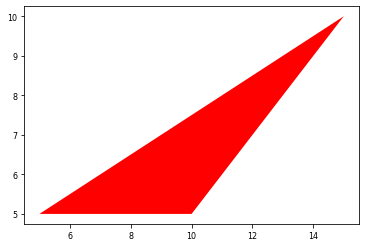

In [60]:
a = [5, 10, 15]
b = [5, 5, 10]
plt.fill(a, b, 'r')

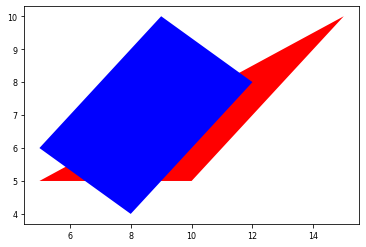

In [61]:
a = [5, 10, 15]
b = [5, 5, 10]

c = [5, 8, 12,9]
d = [6, 4, 8,10]

plt.fill(a, b, 'r',c,d,'b')

<AxesSubplot:>

Text(5, 5, '1')

Text(10, 5, '2')

Text(15, 10, '3')

Text(10, 15, '4')

Text(5, 10, '5')

<AxesSubplot:>

Text(5, 5, '1')

Text(5, 10, '2')

Text(10, 5, '3')

Text(15, 10, '4')

Text(10, 15, '5')

<AxesSubplot:>

<AxesSubplot:>

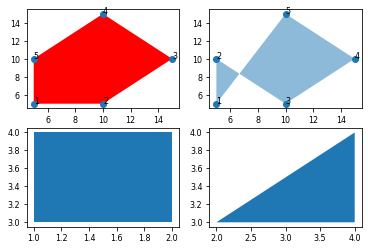

In [62]:
a = [5, 10, 15, 10, 5]
b = [5, 5, 10, 15, 10]

c = [5, 5, 10, 15, 10]
d = [5, 10, 5, 10, 15]

e = [1, 2, 2, 1]
f = [3, 3, 4, 4]

plt.subplot(221)
plt.plot(a, b, 'o')
plt.fill(a, b, 'r')
for index, item in enumerate(zip(a, b), 1):
    plt.text(item[0], item[1], index)

plt.subplot(222)
plt.plot(c, d, 'o')
plt.fill(c, d, alpha=0.5)
for index, item in enumerate(zip(c, d), 1):
    plt.text(item[0], item[1], index)

plt.subplot(223)
plt.fill(e, f)

plt.subplot(224)
plt.fill("time", "signal",
         data={"time": [2, 4, 4], "signal": [3, 4, 3]})

plt.show()

## fill_between:填充两条水平曲线之间的区域

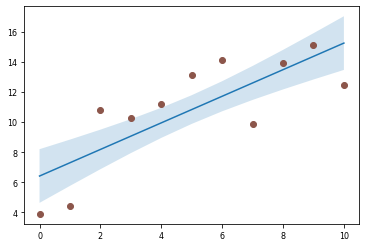

In [63]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

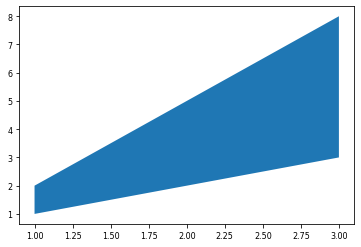

In [64]:
fig = plt.figure()
ax = fig.add_subplot()

x = [1,2,3]
y1 = [1,2,3]
y2 = [2,5,8]

ax.fill_between(x,y1,y2)


## fill_betweenx:Fill the area between two vertical curves.

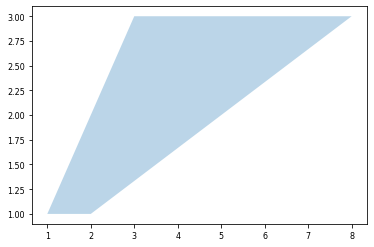

In [65]:
fig = plt.figure()
ax = fig.add_subplot()

y = [1,2,3]
x1 = [1,2,3]
x2 = [2,5,8]

ax.fill_betweenx(y,x1,x2,
                alpha=0.3,
                )

## findobj:递归查找全部 Artist 艺术家中包含的实例。

## flag()	Set the colormap to 'flag'.

## gca:Get the current Axes, creating one if necessary.
    获取当前轴，必要时创建一个。
    为确保返回的轴与给定投影等保持一致，以及在不存在活动轴的情况下创建轴，支持以下Kwarg：Axes属性

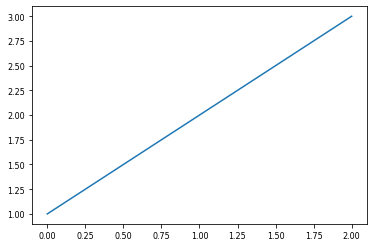

In [66]:
fig = plt.figure()
# ax1 = fig.add_subplot(121)
f = plt.gca()
f.plot([1, 2, 3], label='Inline label1')

## gcf()	Get the current figure.

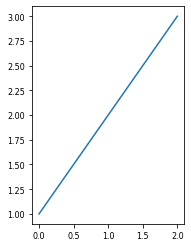

In [67]:
fig = plt.figure()

f = plt.gcf()
ax1 = f.add_subplot(121)

ax1.plot([1, 2, 3], label='Inline label1')

## gci():Get the current colorable artist.

## get():Return the value of an Artist's property, or print all of them.
    Return the value of an Artist's property, or print all of them.
    note: getp is same as get

#1f77b4 #1f77b4 #1f77b4
getp_output:
    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = #1f77b4
    contains = None
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([0., 1.]), array([2, 1]))
    drawstyle or ds = default
    figure = Figure(432x288)
    fillstyle = full
    gid = None
    in_layout = True
    label = _line0
    linestyle or ls = -
    linewidth or lw = 1.5
    marker = None
    markeredgecolor or mec = #1f77b4
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = #1f77b4
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    path = Path(array([[0., 2.],        [1., 1.]]), None)
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = False
    sketch_params = None
    snap = None
    solid_capstyle = projec

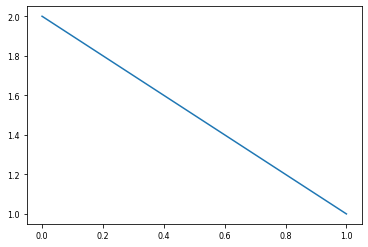

In [68]:
# 获得Line2D对象line
line,=plt.plot([2,1])
# 获取line的color属性值
# 通过Python内置函数getattr和_color属性获取
c1=getattr(line,"_color")

# 通过Python内置函数getattr和get_color方法获取
c2=getattr(line,"get_color")()

# 通过getp函数获取
c3=plt.getp(line,"color")
print(c1,c2,c3)

# 输出line对象的所有属性
print("getp_output:")
plt.getp(line)
print('gid_value:',plt.get(line,'gid'))   #当指定属性名称时,返回该属性的值
plt.show()

## get_current_fig_manager()	Return the figure manager of the current figure.

## get_figlabels()	Return a list of existing figure labels.

[None]

[None]

['fig_a', 'fig_b']

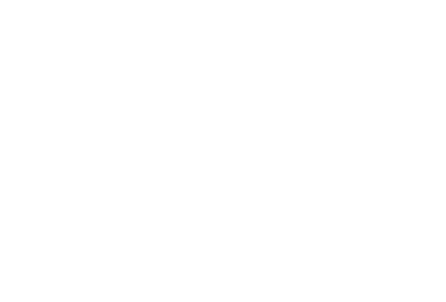

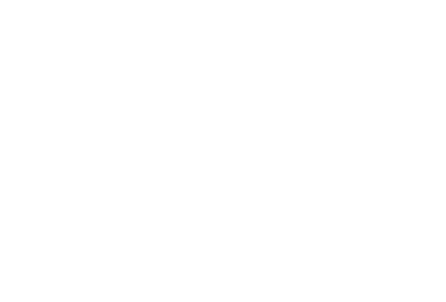

In [69]:
fig_a = plt.figure(num='a',figsize=(6,4))
ax_a1 = fig_a.add_subplot(221,visible=False)
ax_a2 = fig_a.add_subplot(222,visible=False)
ax_a3 = fig_a.add_subplot(223,visible=False)
ax_a4 = fig_a.add_subplot(224,visible=False)
plt.setp(fig_a,label="fig_a")

fig_b = plt.figure(num='b',figsize=(6,4))
ax_b1 = fig_b.add_subplot(231,visible=False)
ax_b2 = fig_b.add_subplot(232,visible=False)
ax_b3 = fig_b.add_subplot(233,visible=False)
ax_b4 = fig_b.add_subplot(234,visible=False)
ax_b5 = fig_b.add_subplot(235,visible=False)
ax_b6 = fig_b.add_subplot(236,visible=False)
plt.setp(fig_b,label="fig_b")

plt.get_figlabels()

## get_fignums()	Return a list of existing figure numbers.

[None]

[None]

[1, 2]
['fig_a', 'fig_b']


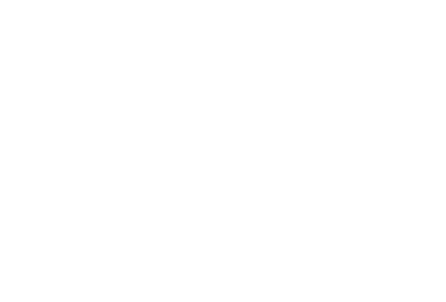

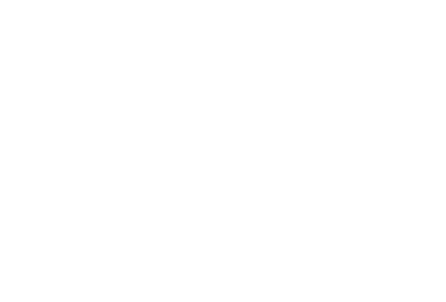

In [70]:
fig_a = plt.figure(num='c',figsize=(6,4))
ax_a1 = fig_a.add_subplot(111,visible=False)
# ax_a2 = fig_a.add_subplot(122,visible=False)
# ax_a3 = fig_a.add_subplot(223,visible=False)
# ax_a4 = fig_a.add_subplot(224,visible=False)
plt.setp(fig_a,label="fig_a")

fig_b = plt.figure(num='b',figsize=(6,4))
ax_b1 = fig_b.add_subplot(111,visible=False)
# ax_b2 = fig_b.add_subplot(132,visible=False)
# ax_b3 = fig_b.add_subplot(133,visible=False)
# ax_b4 = fig_b.add_subplot(234,visible=False)
# ax_b5 = fig_b.add_subplot(235,visible=False)
# ax_b6 = fig_b.add_subplot(236,visible=False)
plt.setp(fig_b,label="fig_b")

print(plt.get_fignums())
print(plt.get_figlabels())


## get_plot_commands()	Get a sorted list of all of the plotting commands.

## getp:Return the value of an Artist's property, or print all of them.
    同get()

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    color or c = #1f77b4
    contains = None
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([0., 1., 2.]), array([1, 2, 3]))
    drawstyle or ds = default
    figure = Figure(432x288)
    fillstyle = full
    gid = None
    in_layout = True
    label = Inline label1
    linestyle or ls = -
    linewidth or lw = 1.5
    marker = None
    markeredgecolor or mec = #1f77b4
    markeredgewidth or mew = 1.0
    markerfacecolor or mfc = #1f77b4
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    path = Path(array([[0., 1.],        [1., 2.],        [2.,...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = False
    sketch_params = None
    snap = None
    solid_capstyle = projecting
    solid_j

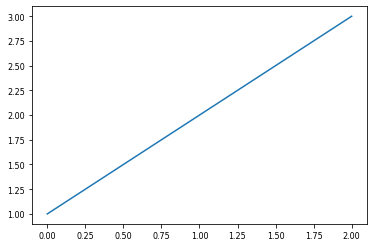

In [71]:
fig = plt.figure()
# ax1 = fig.add_subplot(121)
f = plt.gca()
line = f.plot([1, 2, 3], label='Inline label1')

plt.getp(line)

## ginput([n, timeout, show_clicks, mouse_add, ...])	Blocking call to interact with a figure.

## gray()	Set the colormap to 'gray'.

## grid([b, which, axis])	Configure the grid lines.

Text(0.5, 1.0, 'plt.grid()')

Text(0.5, 2, 'plt.grid()')

Text(0.5, 5, "ax3.minorticks_on() #open minor ticks\nax3.grid(which='minor',axis='x')")

Text(0.5, 1, "ax4.minorticks_on() #open minor ticks\nax4.grid(which='major',axis='x')")

Text(0.5, 0.98, 'grid')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


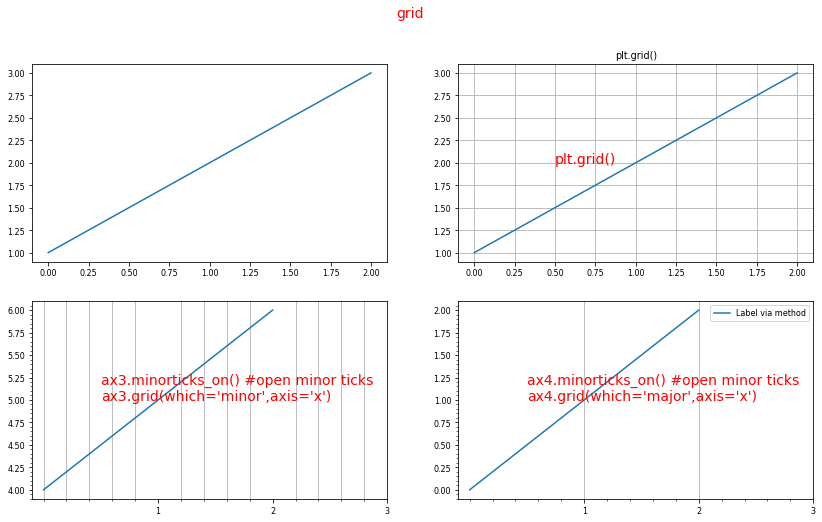

In [72]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1, 2, 3], label='Inline label')

ax2 = fig.add_subplot(222)
line, = ax2.plot([1, 2, 3])
ax2.set_title("plt.grid()")
plt.grid() 
ax2.text(s="plt.grid()",x=0.5,y=2,color='r',fontsize=14)

ax3 = fig.add_subplot(223)
ax3.plot([4,5,6], label='Inline label')
ax3.set_xticks([1,2,3])
ax3.minorticks_on()      #打开次刻度
ax3.grid(which="minor",axis='x')
ax3.text(s="ax3.minorticks_on() #open minor ticks\nax3.grid(which='minor',axis='x')",x=0.5,y=5,color='r',fontsize=14)

ax4 = fig.add_subplot(224)
line, = ax4.plot([0, 1, 2])
line.set_label('Label via method')
ax4.set_xticks([1,2,3])
ax4.minorticks_on()
ax4.legend()
plt.grid(which='major',axis='x')
ax4.text(s="ax4.minorticks_on() #open minor ticks\nax4.grid(which='major',axis='x')",x=0.5,y=1,color='r',fontsize=14)

fig.suptitle("grid",fontsize=14,color='r')

## hexbin:	Make a 2D hexagonal binning plot of points x, y.

In [ ]:
dtc.head(1)

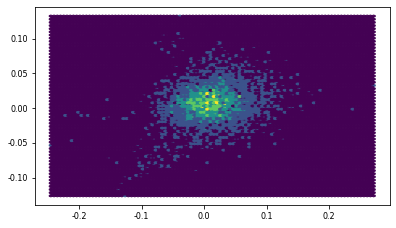

In [73]:
x = dtc["Pm2p5MassConcDutAccuracy_1"]
y = dtc["Pm2p5MassConcDutAccuracy_2"]

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.hexbin(x,y,
          bins=5,
          
          
          )


plt.show()

## hist:Plot a histogram.

(array([  49.,  198., 1110., 2316., 3153., 3852., 4046., 4082., 4083.,
        4084.]),
 array([379.68670654, 425.80024414, 471.91378174, 518.02731934,
        564.14085693, 610.25439453, 656.36793213, 702.48146973,
        748.59500732, 794.70854492, 840.82208252]),
 [<matplotlib.patches.Polygon at 0x1ae428b92b0>])

(array([4.900e+01, 1.490e+02, 9.120e+02, 1.206e+03, 8.370e+02, 6.990e+02,
        1.940e+02, 3.600e+01, 1.000e+00, 1.000e+00]),
 array([379.68670654, 425.80024414, 471.91378174, 518.02731934,
        564.14085693, 610.25439453, 656.36793213, 702.48146973,
        748.59500732, 794.70854492, 840.82208252]),
 <BarContainer object of 10 artists>)

(array([[5.000e+00, 5.000e+00, 2.900e+01, 3.430e+02, 1.751e+03, 1.587e+03,
         3.250e+02, 3.400e+01, 3.000e+00, 2.000e+00],
        [5.000e+00, 5.000e+00, 3.900e+01, 4.580e+02, 4.120e+03, 3.117e+03,
         3.840e+02, 3.500e+01, 3.000e+00, 2.000e+00]]),
 array([-0.24498451, -0.19337558, -0.14176666, -0.09015773, -0.0385488 ,
         0.01306012,  0.06466905,  0.11627797,  0.1678869 ,  0.21949583,
         0.27110475]),
 <a list of 2 BarContainer objects>)

array([7.000e+01, 5.010e+02, 1.411e+03, 1.171e+03, 7.690e+02, 1.540e+02,
       7.000e+00, 1.000e+00])

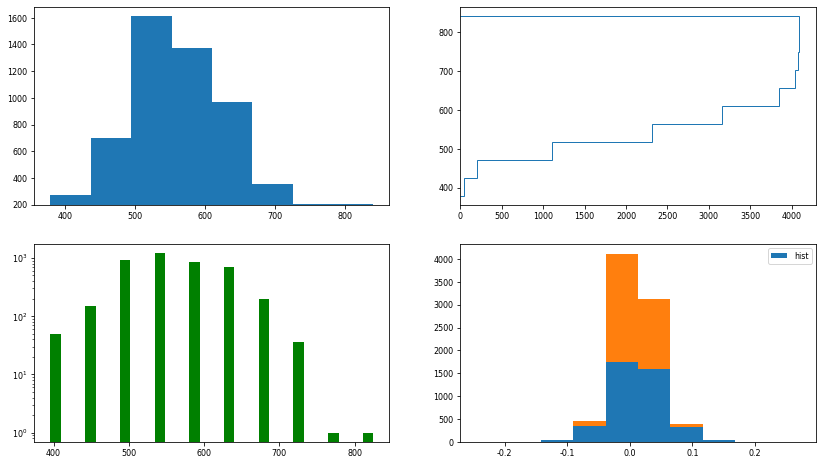

In [74]:
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(221)
n,bins,patches = ax1.hist(dtc["Pm2p5MassConcDutMean_1"],
                         bins=8,
#                          density=True,   #True时,返回的n是 %,否则是 n个
                         cumulative=False,  #bool,累计
                         bottom=200,     #底部的起点
                         histtype="bar",  #柱状图类型,{'bar'，'barstacked'，'step'，'stepfilled'}，默认值：'bar'
                         align="mid",     #{'left'，'mid'，'right'}，默认值：'mid', 和x轴上标签对齐方式
                         orientation="vertical",   #{'vertical'，'horizontal'}，默认值：'vertical'
                         rwidth=None, 
                          
                          
                          
                         )

ax2 = fig.add_subplot(222)
ax2.hist(dtc["Pm2p5MassConcDutMean_1"],
         cumulative=True,
         histtype="step",
        orientation="horizontal",
        )

ax3 = fig.add_subplot(223)
ax3.hist(dtc["Pm2p5MassConcDutMean_1"],
         rwidth=0.3,
         log=True,
         color='green'

        )
ax4 = fig.add_subplot(224)
ax4.hist(dtc[["Pm2p5MassConcDutAccuracy_1","Pm2p5MassConcDutAccuracy_2"]],
         histtype="bar",
         label="hist",
         stacked=True
        )
plt.legend()
n

## hist2d(x, y[, bins, range, density, ...])	Make a 2D histogram plot.

In [ ]:
dtc.head(2)

(array([[  0.,   1.,   2.,   4.,  23.,  19.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  18.,  50.,  34.,  33.,   8.,   3.,   3.,   0.],
        [  1.,   3.,  47., 154., 143., 224., 240.,  89.,  10.,   1.],
        [  3.,  22.,  73., 102., 204., 356., 301., 111.,  31.,   3.],
        [  2.,   7.,  45.,  30., 128., 257., 268.,  86.,  14.,   0.],
        [  0.,   0.,   2.,  13., 104., 198., 256., 112.,  12.,   2.],
        [  0.,   0.,   0.,   1.,  49.,  38.,  67.,  34.,   5.,   0.],
        [  0.,   0.,   0.,   1.,   7.,  11.,  10.,   6.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.]]),
 array([379.68670654, 425.80024414, 471.91378174, 518.02731934,
        564.14085693, 610.25439453, 656.36793213, 702.48146973,
        748.59500732, 794.70854492, 840.82208252]),
 array([231.7268219 , 240.76092072, 249.79501953, 258.82911835,
        267.86321716, 276.89731598, 285.93141479, 294.

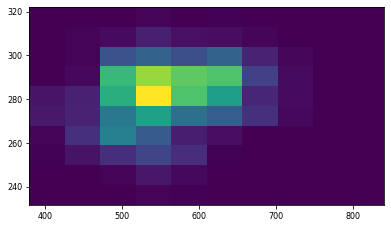

In [75]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)

ax1.hist2d(dtc["Pm2p5MassConcDutMean_1"],dtc["Pm2p5MassConcDutMean_2"],
          bins=10,
          
          
          )



plt.show()

## hlines:	画多条指定起点和终点的水平线

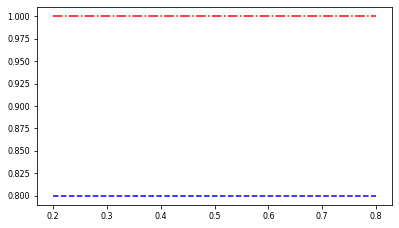

In [76]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)

ax1.hlines([1,0.8],
           xmin=0.2,
           xmax=0.8,
           colors=['r','blue'],
          linestyles=['-.','--'],
          )

plt.show()

## hot()	Set the colormap to 'hot'.

## hsv()	Set the colormap to 'hsv'.

## imread:Read an image from a file into an array.读取图片

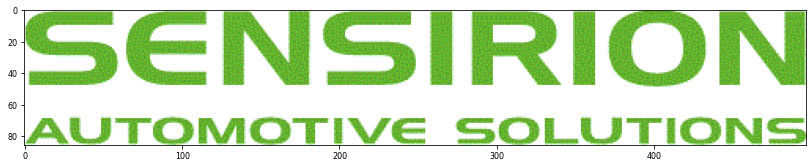

In [77]:
fp = r"C:\python\function\testfile\Logo.png"

with cbook.get_sample_data(fp) as im_file:
    im = plt.imread(im_file)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
ax.imshow(im)

## imsave:Save an array as an image file.

In [78]:
plt.imsave("imsave.png",im)

## imshow:Display data as an image, 
    i.e., on a 2D regular raster.

In [79]:
x = data["low"][:100].tolist()
y = data["close"][:100].tolist()
z = data["high"][:100].tolist()

ValueError: no field of name low

Text(0, 0, '1')

Text(1, 0, '2')

Text(0, 1, '3')

Text(1, 1, '4')

Text(0, 2, '5')

Text(1, 2, '6')

Text(0, 3, '7')

Text(1, 3, '8')

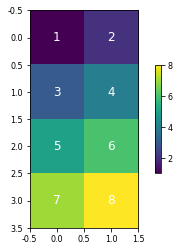

In [80]:
arr = [[1,2], [3,4], [5,6],[7,8]]
plt.imshow(X=arr,   #数组里的值会映射到颜色,x,y轴的坐标是基于数组中竖直位置来的
          )
for i in range(4):
    for j in range(2):
        plt.text(s=arr[i][j],x=j,y=i,color='white',fontsize=12, ha="center", va="center")
        
# cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=None, ax=None, shrink=0.5)

## inferno()	Set the colormap to 'inferno'.

## install_repl_displayhook()	
    Install a repl display hook so that any stale figure are automatically redrawn when control is returned to the repl.

## ioff()	Disable interactive mode.

## ion()	Enable interactive mode.

Text(0, 0, 'use notebook')

name 'lines' is not defined


<ipython-input-81-329d5b6c1068>:15: RuntimeWarning: divide by zero encountered in true_divide
  lines = ax.plot(x, y/i, 'r-', lw=5)


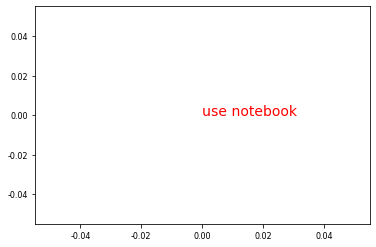

x,y=(-1.0,-1.2246467991473532e-16)
x,y=(-0.9595959595959596,-0.12659245357374938)
x,y=(-0.9191919191919192,-0.2511479871810793)
x,y=(-0.8787878787878788,-0.3716624556603276)
x,y=(-0.8383838383838383,-0.4861967361004687)
x,y=(-0.797979797979798,-0.5929079290546404)
x,y=(-0.7575757575757576,-0.6900790114821119)
x,y=(-0.7171717171717171,-0.776146464291757)
x,y=(-0.6767676767676767,-0.8497254299495146)
x,y=(-0.6363636363636364,-0.9096319953545184)
x,y=(-0.5959595959595959,-0.954902241444074)
x,y=(-0.5555555555555556,-0.984807753012208)
x,y=(-0.5151515151515151,-0.998867339183008)
x,y=(-0.4747474747474747,-0.9968547759519423)
x,y=(-0.43434343434343425,-0.9788024462147786)


In [81]:
x = np.linspace(-1, 1, 100)
y = np.sin(x*np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.text(s="use notebook",x=0,y=0,fontsize=14,color='r')
plt.ion()
for i in range(30):
    if i%2==0:
        try:
            ax.lines.remove(lines[0])
            # pass
#             ax.cla()
        except Exception as e:
            print(e)
        lines = ax.plot(x, y/i, 'r-', lw=5)
        plt.pause(0.3)
        print('x,y=({},{})'.format(x[i], y[i]))
plt.ioff()
plt.show()

<ipython-input-82-32a848b54275>:15: RuntimeWarning: divide by zero encountered in true_divide
  lines = ax.plot(x, y/i, 'r-', lw=5)


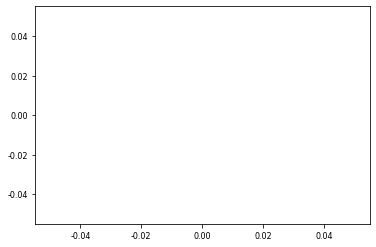

x,y=(-1.0,-1.2246467991473532e-16)
x,y=(-0.9595959595959596,-0.12659245357374938)
x,y=(-0.9191919191919192,-0.2511479871810793)
x,y=(-0.8787878787878788,-0.3716624556603276)
x,y=(-0.8383838383838383,-0.4861967361004687)
x,y=(-0.797979797979798,-0.5929079290546404)
x,y=(-0.7575757575757576,-0.6900790114821119)
x,y=(-0.7171717171717171,-0.776146464291757)
x,y=(-0.6767676767676767,-0.8497254299495146)
x,y=(-0.6363636363636364,-0.9096319953545184)
x,y=(-0.5959595959595959,-0.954902241444074)
x,y=(-0.5555555555555556,-0.984807753012208)
x,y=(-0.5151515151515151,-0.998867339183008)
x,y=(-0.4747474747474747,-0.9968547759519423)
x,y=(-0.43434343434343425,-0.9788024462147786)


In [82]:
# 注意与下面这种方式的区别,下面这种方式会改变坐标轴的刻度
x = np.linspace(-1, 1, 100)
y = np.sin(x*np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
for i in range(30):
    if i%2==0:
        try:
            # ax.lines.remove(lines[0])
            # pass
            ax.cla()    #清理axes上面的内容
        except Exception as e:
            print(e)
        lines = ax.plot(x, y/i, 'r-', lw=5)
        plt.pause(0.3)
        print('x,y=({},{})'.format(x[i], y[i]))
plt.ioff()
plt.show()

## isinteractive:判断plot是否处于交互模式

## jet()	Set the colormap to 'jet'.

## legend(*args, **kwargs)	Place a legend on the Axes.

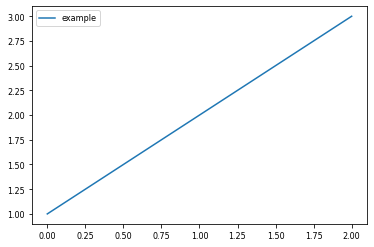

In [83]:
plt.plot([1,2,3],label="example")
plt.legend()

## locator_params:Control behavior of major tick locators.刻度控制

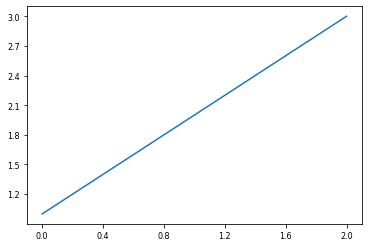

In [84]:
plt.plot([1,2,3],label="example")
plt.locator_params(axis='both',tight=True,nbins=5,steps=[2,3,4,6],prune='both',min_n_ticks=6)

## loglog:Make a plot with log scaling on both the x and y axis.

[]

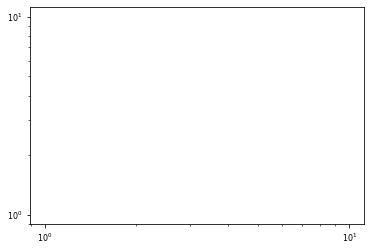

In [85]:
fig = plt.figure()
ax.plot([1,2,3])
plt.loglog()

## magma:Set the colormap to 'magma'.

## magnitude_spectrum(x[, Fs, Fc, window, ...])	Plot the magnitude spectrum.

## margins(*margins[, x, y, tight])	Set or retrieve autoscaling margins.

([<matplotlib.axis.XTick at 0x1ae436d9520>,
 [Text(1, 0, 'Frogs'),
  Text(2, 0, 'Hogs'),
  Text(3, 0, 'Bogs'),
  Text(4, 0, 'Slogs')])

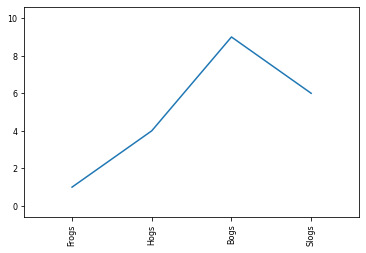

In [86]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

## matshow:将二维矩阵或数组可视化为彩色编码图像。

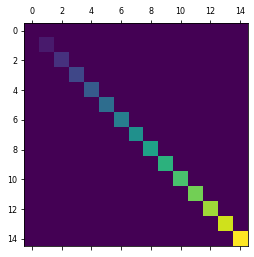

In [87]:
a = np.diag(range(15))

plt.matshow(a)

plt.show()

## minorticks_off()	Remove minor ticks from the axes.关闭次坐标

## minorticks_on()	Display minor ticks on the axes.显示次坐标

Text(0.25, 2, 'minorticks_off')

Text(0.25, 2, 'minorticks_on')

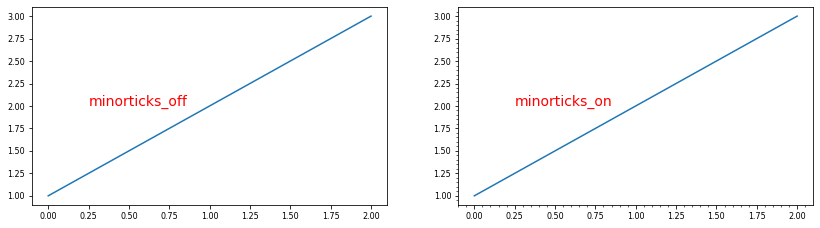

In [88]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax1.plot([1, 2, 3], label='Inline label')
ax1.minorticks_off()
ax1.text(s="minorticks_off",x=0.25,y=2,fontsize=14,color='r')

ax2 = fig.add_subplot(222)
line, = ax2.plot([1, 2, 3])
ax2.minorticks_on()
ax2.text(s="minorticks_on",x=0.25,y=2,fontsize=14,color='r')

plt.show()

## new_figure_manager(num, *args, **kwargs)	Create a new figure manager instance.

## nipy_spectral()	Set the colormap to 'nipy_spectral'.

## pause:	Run the GUI event loop for interval seconds.

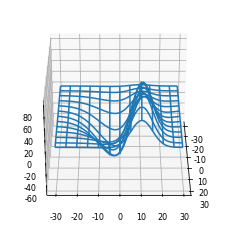

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [89]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

## pcolor:使用非规则矩形网格创建伪彩色绘图

Text(0.5, 1.0, 'pcolor')

Text(0.5, 1.0, 'pcolormesh')

Text(0.5, 1.0, 'image (nearest, aspect="auto")')

Text(0.5, 1.0, 'pcolorfast')

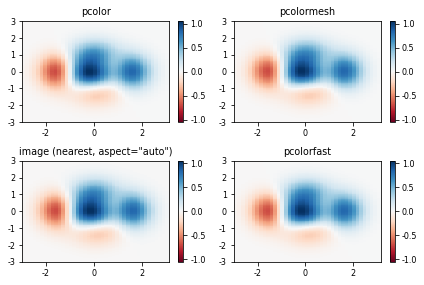

In [90]:
# make these smaller to increase the resolution
dx, dy = 0.15, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[-3:3+dy:dy, -3:3+dx:dx]
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -abs(z).max(), abs(z).max()

fig, axs = plt.subplots(2, 2)

ax = axs[0, 0]
c = ax.pcolor(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolor')
fig.colorbar(c, ax=ax)

ax = axs[0, 1]
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
fig.colorbar(c, ax=ax)

ax = axs[1, 0]
c = ax.imshow(z, cmap='RdBu', vmin=z_min, vmax=z_max,
              extent=[x.min(), x.max(), y.min(), y.max()],
              interpolation='nearest', origin='lower', aspect='auto')
ax.set_title('image (nearest, aspect="auto")')
fig.colorbar(c, ax=ax)

ax = axs[1, 1]
c = ax.pcolorfast(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolorfast')
fig.colorbar(c, ax=ax)

fig.tight_layout()
plt.show()

## pcolormesh:使用非规则矩形网格创建伪彩色绘图

## phase_spectrum:绘制相位谱

## pie:Plot a pie chart.饼图

([<matplotlib.patches.Wedge at 0x1ae4717a370>,
 [Text(1.089577239417497, 2.1384156376493664, 'Frogs'),
  Text(2.472746882188294, -0.8034443705870827, 'Hogs'),
  Text(-2.1384157396629404, -1.089577039204571, 'Dogs'),
  Text(-0.7416406903319884, 2.282535670355206, 'Logs')],
 [Text(0.7263848262783315, 1.4256104250995776, '15.0%'),
  Text(1.7119016876688187, -0.5562307180987497, '30.0%'),
  Text(-1.425610493108627, -0.7263846928030474, '45.0%'),
  Text(-0.49442712688799234, 1.521690446903471, '10.0%')])

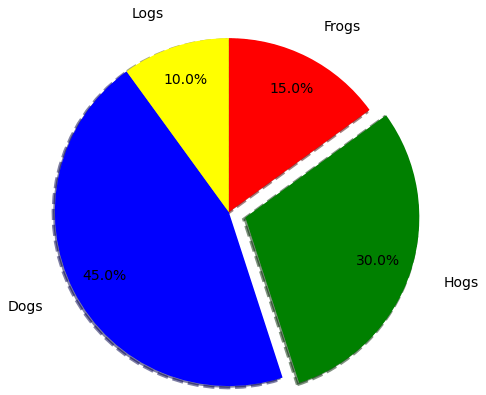

In [91]:
labels= 'Frogs','Hogs','Dogs','Logs'
size = [15,30,45,10]
explode = (0,0.2,0,0)

fig,ax = plt.subplots()

ax.pie(size,
      explode=explode,     #第几个饼往外偏,偏移量为该系数乘以半径
       labels=labels,
       colors=['r','green','blue','yellow'],  #设置每个饼的颜色
       autopct='%1.1f%%',    #在饼上可以显示百分比或字符串, '%1.1f%%' 第二个1是1位小数位
       pctdistance=0.8,      #autopct 百分数离中心的距离,default,0.6
       shadow=True,        #阴影
       normalize=True,
       labeldistance=1.2,  #标签到中心的距离
       startangle=90,      #四象限,默认从x轴的正轴开始, 90就是逆时针旋转90度
       radius=2,       #default:1
       counterclock=False,    #default: True; 顺序是顺时针还是逆时针
       wedgeprops={'linestyle':'--','linewidth':3},     #设置pie属性的dict,更多参数见wedge类实例
       textprops={"fontsize":14,"color":"black"}
       
       
       
      )
plt.show()

## pink()	Set the colormap to 'pink'.

## plasma()	Set the colormap to 'plasma'.

## plot:绘制Y和X作为直线和/或标记

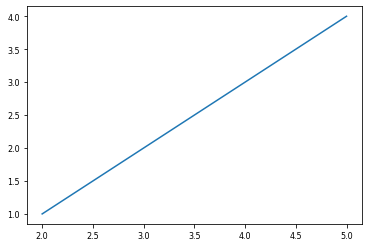

In [95]:
plt.plot([2,3,4,5],[1,2,3,4])

## plot_date:Plot co-ercing the axis to treat floats as dates.包含日期的绘图数据

In [96]:
dt = data.head(20).reset_index()
dt.head(2)

,trade_date,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,2021-03-19,000009.SZ,8.70,8.78,8.65,8.76,8.71,0.05,0.5741,321843.00,280668.282
1,2021-03-22,000009.SZ,8.74,8.99,8.71,8.92,8.76,0.16,1.8265,311235.89,276282.075


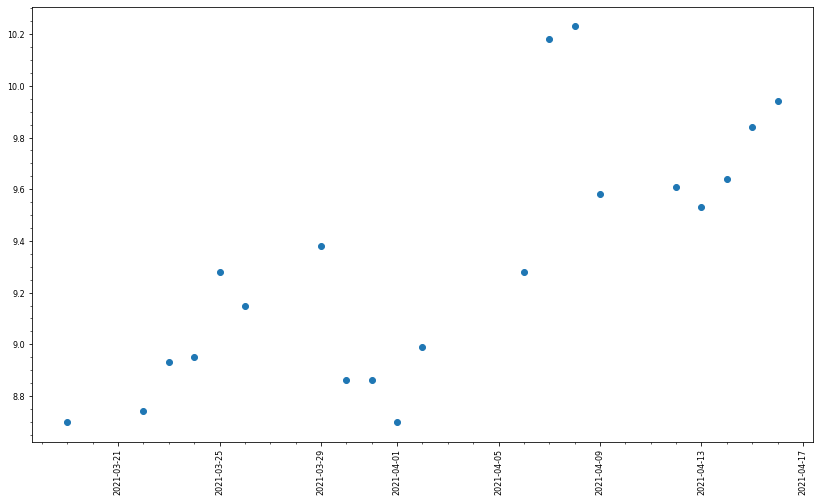

In [97]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
ax.plot_date(dt.trade_date,dt["open"],xdate=True)
plt.tick_params(axis='x',rotation=90)
# ax.locator_params(nbins=5,axis='x')
plt.minorticks_on()

## polar:Make a polar plot.

Text(0.5, 1.0, 'A line plot on a polar axis')

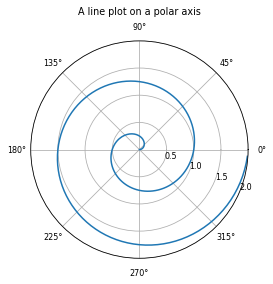

In [98]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

## prism()	Set the colormap to 'prism'.

## psd:Plot the power spectral density.绘制功率谱密度

## specgram(x[, NFFT, Fs, Fc, detrend, window, ...])	Plot a spectrogram.

## spring()	Set the colormap to 'spring'.

## tick_params([axis])	Change the appearance of ticks, tick labels, and gridlines.

## ticklabel_format(*[, axis, style, ...])	Configure the ScalarFormatter used by default for linear axes.

## tight_layout(*[, pad, h_pad, w_pad, rect])	Adjust the padding between and around subplots.

## title(label[, fontdict, loc, pad, y])	Set a title for the Axes.

## tricontour(*args, **kwargs)	Draw contour lines on an unstructured triangular grid.

## tricontourf(*args, **kwargs)	Draw contour regions on an unstructured triangular grid.

## tripcolor(*args[, alpha, norm, cmap, vmin, ...])	Create a pseudocolor plot of an unstructured triangular grid.

## triplot(*args, **kwargs)	Draw a unstructured triangular grid as lines and/or markers.

## twinx([ax])	Make and return a second axes that shares the x-axis.

## twiny([ax])	Make and return a second axes that shares the y-axis.

## uninstall_repl_displayhook()	Uninstall the matplotlib display hook.

## violinplot(dataset[, positions, vert, ...])	Make a violin plot.

## viridis()	Set the colormap to 'viridis'.

## vlines(x, ymin, ymax[, colors, linestyles, ...])	Plot vertical lines at each x from ymin to ymax.

## waitforbuttonpress([timeout])	Blocking call to interact with the figure.

## winter()	Set the colormap to 'winter'.

## xcorr(x, y[, normed, detrend, usevlines, ...])	Plot the cross correlation between x and y.

## xkcd([scale, length, randomness])	Turn on xkcd sketch-style drawing mode.

## xlabel(xlabel[, fontdict, labelpad, loc])	Set the label for the x-axis.

## xlim(*args, **kwargs)	Get or set the x limits of the current axes.

## xscale(value, **kwargs)	Set the x-axis scale.

## xticks([ticks, labels])	Get or set the current tick locations and labels of the x-axis.

## ylabel(ylabel[, fontdict, labelpad, loc])	Set the label for the y-axis.

## ylim(*args, **kwargs)	Get or set the y-limits of the current axes.

## yscale(value, **kwargs)	Set the y-axis scale.

## yticks([ticks, labels])	Get or set the current tick locations and labels of the y-axis.

# Test:

In [4]:
data.head(2)

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2021-03-19,000009.SZ,8.70,8.78,8.65,8.76,8.71,0.05,0.5741,321843.00,280668.282
2021-03-22,000009.SZ,8.74,8.99,8.71,8.92,8.76,0.16,1.8265,311235.89,276282.075


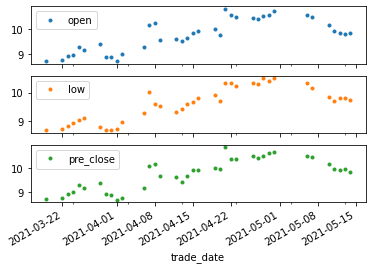

In [5]:
axs = data[['open','low','pre_close']].plot(style='.',subplots=True)

In [11]:
for ax in axs:
    # print(ax.get_legend())
    ax.getattr(legend)

AttributeError: 'AxesSubplot' object has no attribute 'getattr'